In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("settles.acl16.learning_traces.13m.csv")

In [15]:
df.head()

p_recall   timestamp     delta user_id learning_language ui_language  \
0       1.0  1362076081  27649635    u:FO                de          en   
1       0.5  1362076081  27649635    u:FO                de          en   
2       1.0  1362076081  27649635    u:FO                de          en   
3       0.5  1362076081  27649635    u:FO                de          en   
4       1.0  1362076081  27649635    u:FO                de          en   

                          lexeme_id                     lexeme_string  \
0  76390c1350a8dac31186187e2fe1e178  lernt/lernen<vblex><pri><p3><sg>   
1  7dfd7086f3671685e2cf1c1da72796d7     die/die<det><def><f><sg><nom>   
2  35a54c25a2cda8127343f6a82e6f6b7d          mann/mann<n><m><sg><nom>   
3  0cf63ffe3dda158bc3dbd55682b355ae          frau/frau<n><f><sg><nom>   
4  84920990d78044db53c1b012f5bf9ab5    das/das<det><def><nt><sg><nom>   

   history_seen  history_correct  session_seen  session_correct  
0             6                4             2                2  
1             4                4             2                1  
2             5                4             1                1  
3             6                5             2                1  
4             4                4             1                1

13518

In [6]:
df.shape

(12854226, 12)

In [689]:
df["learning_language"].value_counts()

en    5014791
es    3407689
fr    1873734
de    1452597
it     793935
pt     311480
Name: learning_language, dtype: int64

In [690]:
df["ui_language"].value_counts()

en    7839435
es    3641179
pt     949460
it     424152
Name: ui_language, dtype: int64

In [691]:
ll = list(df.learning_language)
ul = list(df.ui_language)
courses = list(zip(ul,ll))

In [692]:
unique_courses = list(set(courses))
unique_courses

[('en', 'es'),
 ('pt', 'en'),
 ('en', 'pt'),
 ('en', 'it'),
 ('en', 'fr'),
 ('it', 'en'),
 ('en', 'de'),
 ('es', 'en')]

In [693]:
len(df.loc[(df.learning_language == 'de') & (df.ui_language == 'en')])

1452597

In [694]:
{course: len(df.loc[(df.learning_language == course[1]) & (df.ui_language == course[0])]) for course in unique_courses}
    

{('en', 'es'): 3407689,
 ('pt', 'en'): 949460,
 ('en', 'pt'): 311480,
 ('en', 'it'): 793935,
 ('en', 'fr'): 1873734,
 ('it', 'en'): 424152,
 ('en', 'de'): 1452597,
 ('es', 'en'): 3641179}

In [695]:
course_list = [it_learn_eng, es_learn_eng, pt_learn_eng, eng_learn_de, eng_learn_es, eng_learn_fr, eng_learn_it, eng_learn_pt]

In [696]:
robustness = {"{} learning {}".format(course[0], course[1]): len(set(df.loc[(df.learning_language == course[1]) & (df.ui_language == course[0])].lexeme_id)) for course in unique_courses}
robustness

{'en learning es': 3302,
 'pt learning en': 2812,
 'en learning pt': 2815,
 'en learning it': 2186,
 'en learning fr': 4184,
 'it learning en': 2428,
 'en learning de': 3809,
 'es learning en': 2881}

In [697]:
robustness['en learning it']

2186

In [698]:
for k, v in robustness.items():
    print(v, k[:2], k[-2:])

3302 en es
2812 pt en
2815 en pt
2186 en it
4184 en fr
2428 it en
3809 en de
2881 es en


In [699]:
list(robustness.keys())

['en learning es',
 'pt learning en',
 'en learning pt',
 'en learning it',
 'en learning fr',
 'it learning en',
 'en learning de',
 'es learning en']

In [700]:
course_nums = list(enumerate(list(robustness.keys())))
course_nums

[(0, 'en learning es'),
 (1, 'pt learning en'),
 (2, 'en learning pt'),
 (3, 'en learning it'),
 (4, 'en learning fr'),
 (5, 'it learning en'),
 (6, 'en learning de'),
 (7, 'es learning en')]

In [701]:
conditions = [
    ((df['learning_language'] == k[-2:]) & (df['ui_language'] == k[:2])) 
    for k in list(robustness.keys())]
choices = [v[0] for v in course_nums]
df['course_num'] = np.select(conditions, choices)

In [702]:
len(set(df.user_id))

115222

In [703]:
it_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'it')]
es_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'es')]
pt_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'pt')]
eng_learn_it =df.loc[(df.learning_language == 'it') & (df.ui_language == 'en')]
eng_learn_es =df.loc[(df.learning_language == 'es') & (df.ui_language == 'en')]
eng_learn_pt =df.loc[(df.learning_language == 'pt') & (df.ui_language == 'en')]
eng_learn_fr =df.loc[(df.learning_language == 'fr') & (df.ui_language == 'en')]
eng_learn_de =df.loc[(df.learning_language == 'de') & (df.ui_language == 'en')]

Text(0.5, 1.0, 'proportion recalled vs history seen (italian learning english)')

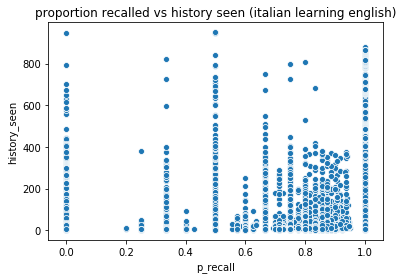

In [366]:
sns.scatterplot(y=it_learn_eng.history_seen, x= it_learn_eng.p_recall)
plt.title("proportion recalled vs history seen (italian learning english)")

Text(0.5, 1.0, 'proportion recalled vs last time seen seen (italian learning english)')

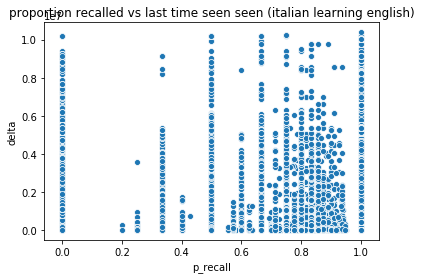

In [367]:
sns.scatterplot(y=it_learn_eng.delta, x= it_learn_eng.p_recall)
plt.title("proportion recalled vs last time seen seen (italian learning english)")

Text(0.5, 1.0, 'proportion recalled vs history seen (italian learning english)')

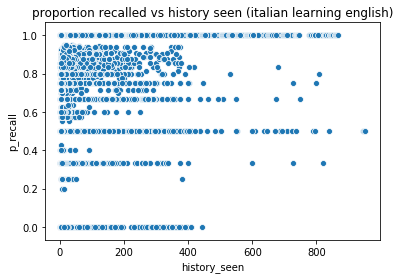

In [369]:
sns.scatterplot(x="history_seen", y= "p_recall", data = it_learn_eng.loc[it_learn_eng.session_seen>1])
plt.title("proportion recalled vs history seen (italian learning english)")

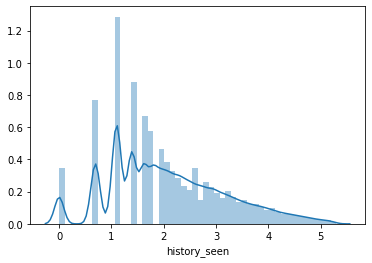

In [704]:
sns.distplot(np.log(it_learn_eng.loc[it_learn_eng.history_seen < 200].history_seen))

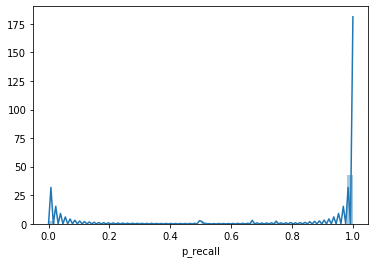

In [371]:
sns.distplot(it_learn_eng.p_recall)

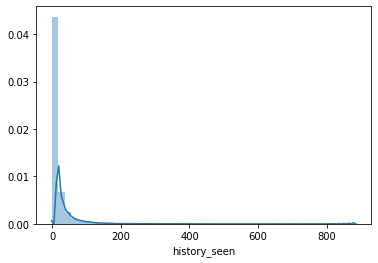

In [372]:
sns.distplot(it_learn_eng.loc[it_learn_eng.p_recall == 1].history_seen)

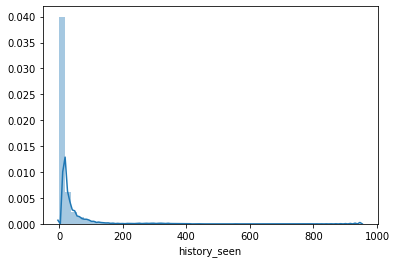

In [373]:
sns.distplot(it_learn_eng.loc[it_learn_eng.p_recall == 0].history_seen)

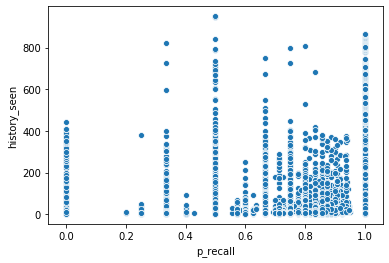

In [375]:
sns.scatterplot(x="p_recall", y = "history_seen", 
                data = it_learn_eng.loc[(it_learn_eng.session_seen>1)&(it_learn_eng.session_seen != it_learn_eng.history_seen)])

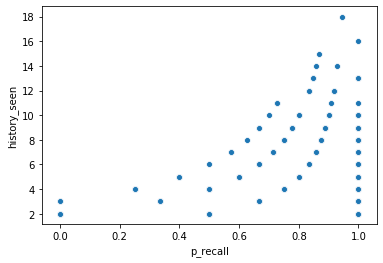

In [376]:
sns.scatterplot(x="p_recall", y = "history_seen", 
                data = it_learn_eng.loc[(it_learn_eng.session_seen>1)&(it_learn_eng.session_seen == it_learn_eng.history_seen)])

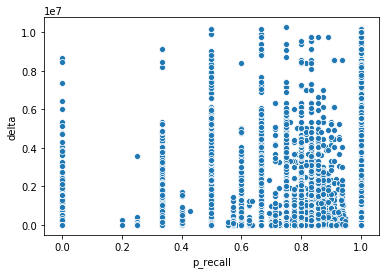

In [377]:
sns.scatterplot(x="p_recall", y = "delta", 
                data = it_learn_eng.loc[(it_learn_eng.session_seen>1)&(it_learn_eng.session_seen != it_learn_eng.history_seen)])

In [378]:
type(list(it_learn_eng.delta)[0])

int

In [379]:
type(it_learn_eng.delta[136])

numpy.int64

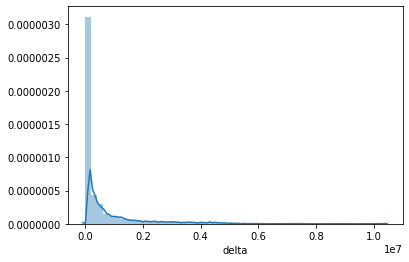

In [380]:
sns.distplot(it_learn_eng.delta)

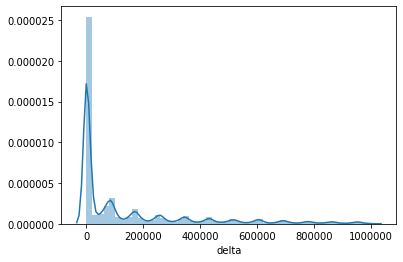

In [381]:
sns.distplot(it_learn_eng.loc[it_learn_eng.delta<1000000].delta)

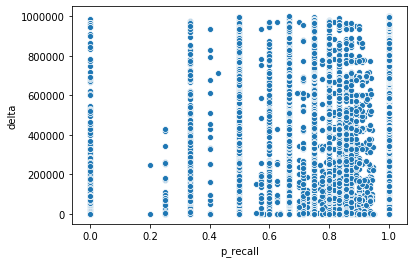

In [382]:
sns.scatterplot(x="p_recall", y = "delta", 
                data = it_learn_eng.loc[it_learn_eng.delta<1000000].loc[(it_learn_eng.loc[it_learn_eng.delta<1000000].session_seen>1)&(it_learn_eng.loc[it_learn_eng.delta<1000000].session_seen != it_learn_eng.loc[it_learn_eng.delta<1000000].history_seen)])



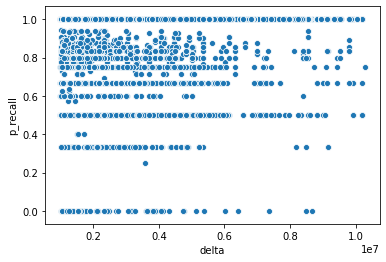

In [383]:
sns.scatterplot(x="delta", y = "p_recall", 
                data = it_learn_eng.loc[it_learn_eng.delta>1000000].loc[(it_learn_eng.loc[it_learn_eng.delta>1000000].session_seen>1)&(it_learn_eng.loc[it_learn_eng.delta>1000000].session_seen != it_learn_eng.loc[it_learn_eng.delta>1000000].history_seen)])


In [705]:
it_learn_eng = it_learn_eng.sort_values(['user_id','timestamp'], ascending=[True, True])
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
3004633       1.0  1362330934  252471   u:HDJ                en          it   
3004634       0.5  1362330934  252471   u:HDJ                en          it   
3004635       1.0  1362330934  252471   u:HDJ                en          it   
3004636       1.0  1362330934  252471   u:HDJ                en          it   
3004637       1.0  1362330934  252471   u:HDJ                en          it   

                                lexeme_id       lexeme_string  history_seen  \
3004633  dbb7591f283beec7f6ef3b4a07cc05a3      even/even<adv>            11   
3004634  22ae70952558ea3b3e01f94ce3a50bbd      just/just<adv>             8   
3004635  cff2d760888774c8011ed92d80ae3312  always/always<adv>            15   
3004636  4a4c57cc0632cb297e94efc594db617a      only/only<adv>            14   
3004637  b7734a9e942f3e39f2d20b72bb598add      once/once<adv>            11   

         history_correct  session_seen  session_correct  course_num  \
3004633               10             3                3           5   
3004634                4             2                1           5   
3004635               15             3                3           5   
3004636               13             3                3           5   
3004637               10             4                4           5   

         overall_recall  session-overall  
3004633        0.909091         0.090909  
3004634        0.500000         0.000000  
3004635        1.000000         0.000000  
3004636        0.928571         0.071429  
3004637        0.909091         0.090909

In [712]:
users = list(set(it_learn_eng.user_id))
len(users)

3436

In [713]:
it_learn_eng = it_learn_eng.sort_values(['user_id', 'timestamp'])

In [714]:
sorted(timestamp_list)

[1362082525,
 1362082570,
 1362082571,
 1362082606,
 1362082609,
 1362082660,
 1362082664,
 1362082666,
 1362082727,
 1362082735,
 1362082747,
 1362082762,
 1362082820,
 1362082823,
 1362082836,
 1362082868,
 1362082891,
 1362082892,
 1362082911,
 1362082949,
 1362082961,
 1362082999,
 1362083001,
 1362083010,
 1362083016,
 1362083031,
 1362083035,
 1362083047,
 1362083074,
 1362083075,
 1362083084,
 1362083105,
 1362083115,
 1362083122,
 1362083127,
 1362083150,
 1362083151,
 1362083155,
 1362083159,
 1362083173,
 1362083176,
 1362083199,
 1362083205,
 1362083209,
 1362083222,
 1362083294,
 1362083310,
 1362083327,
 1362083329,
 1362083336,
 1362083340,
 1362083346,
 1362083370,
 1362083393,
 1362083404,
 1362083424,
 1362083432,
 1362083447,
 1362083467,
 1362083491,
 1362083516,
 1362083538,
 1362083553,
 1362083611,
 1362083642,
 1362083659,
 1362083726,
 1362083742,
 1362083767,
 1362083814,
 1362083834,
 1362083835,
 1362083840,
 1362083857,
 1362083897,
 1362083922,
 1362083927,

In [715]:
timestamp_list = sorted(list(set(it_learn_eng.timestamp)))
num_list = list(range(0,len(timestamp_list)))
time_num_dict = dict(zip(timestamp_list, num_list))

session_id = [time_num_dict.get(n, n) for n in list(it_learn_eng.timestamp)]
it_learn_eng['session_id'] = session_id

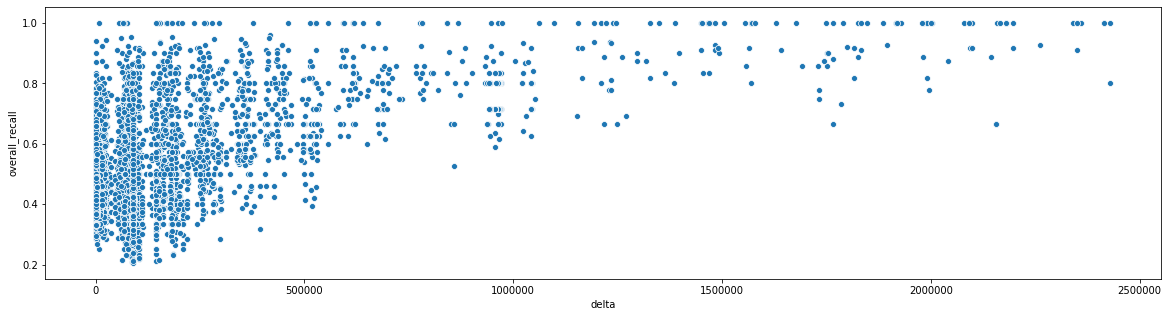

In [396]:
f,ax = plt.subplots(figsize = (20,5))
sns.scatterplot(x='delta', y = 'overall_recall', data = it_learn_eng.loc[it_learn_eng.user_id == 'u:gL_n'].loc[it_learn_eng.history_seen != it_learn_eng.session_seen])

In [710]:
df['overall_recall'] = df['history_correct']/df['history_seen']

In [711]:
it_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'it')]
# es_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'es')]
# pt_learn_eng =df.loc[(df.learning_language == 'en') & (df.ui_language == 'pt')]
# eng_learn_it =df.loc[(df.learning_language == 'it') & (df.ui_language == 'en')]
# eng_learn_es =df.loc[(df.learning_language == 'es') & (df.ui_language == 'en')]
# eng_learn_pt =df.loc[(df.learning_language == 'pt') & (df.ui_language == 'en')]
# eng_learn_fr =df.loc[(df.learning_language == 'fr') & (df.ui_language == 'en')]
# eng_learn_de =df.loc[(df.learning_language == 'de') & (df.ui_language == 'en')]

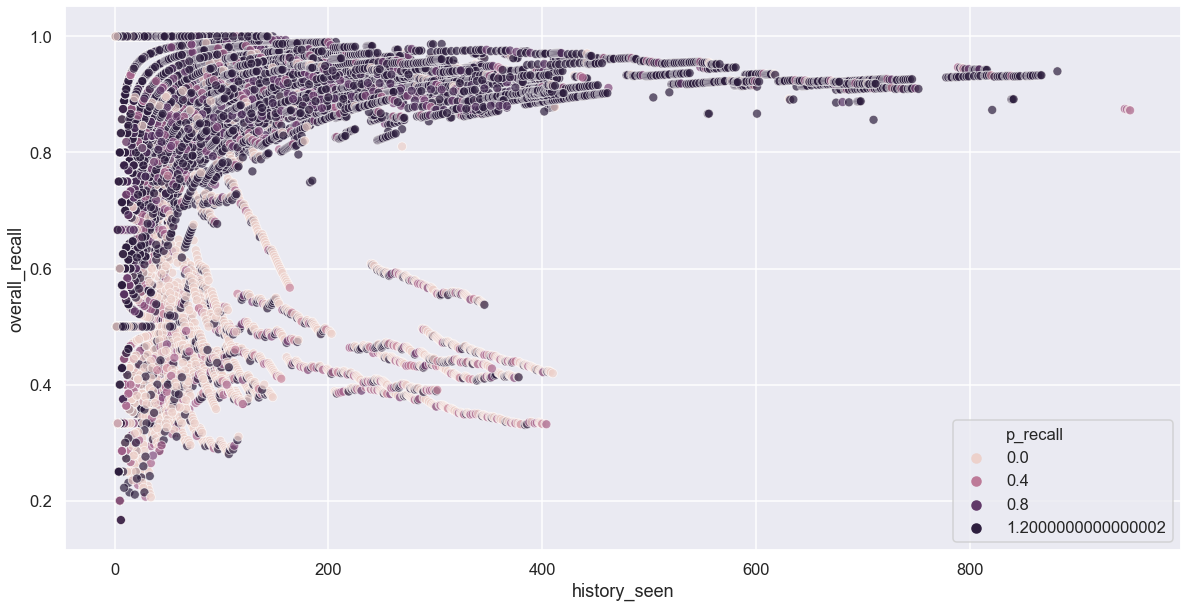

In [717]:
sns.set_context("talk")
sns.set_style("darkgrid")
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(y= it_learn_eng.overall_recall, x = it_learn_eng.history_seen,
                hue = it_learn_eng.p_recall, alpha=0.7)
plt.savefig("Overall_Recall_vs_History_Seen.png")

In [718]:
it_learn_eng.sort_values(['user_id', 'timestamp'])

p_recall   timestamp    delta user_id learning_language ui_language  \
3004633   1.000000  1362330934   252471   u:HDJ                en          it   
3004634   0.500000  1362330934   252471   u:HDJ                en          it   
3004635   1.000000  1362330934   252471   u:HDJ                en          it   
3004636   1.000000  1362330934   252471   u:HDJ                en          it   
3004637   1.000000  1362330934   252471   u:HDJ                en          it   
3004638   1.000000  1362330934   252471   u:HDJ                en          it   
3004639   1.000000  1362330934   252471   u:HDJ                en          it   
4088426   1.000000  1362417834    85471   u:HDJ                en          it   
4088427   1.000000  1362417834    85471   u:HDJ                en          it   
4088428   1.000000  1362417834    85471   u:HDJ                en          it   
4088429   0.500000  1362417834    85471   u:HDJ                en          it   
4088430   1.000000  1362417834    85471   u:HDJ                en          it   
4088431   0.666667  1362417834    85471   u:HDJ                en          it   
4088432   1.000000  1362417834    85471   u:HDJ                en          it   
4115727   1.000000  1362419471     1637   u:HDJ                en          it   
4115728   0.666667  1362419471     1637   u:HDJ                en          it   
4115729   1.000000  1362419471     1637   u:HDJ                en          it   
4115730   0.666667  1362419471     1637   u:HDJ                en          it   
4115731   1.000000  1362419471     1637   u:HDJ                en          it   
4115732   1.000000  1362419471     1637   u:HDJ                en          it   
4115733   1.000000  1362419471     1637   u:HDJ                en          it   
6497899   1.000000  1362595356   262402   u:HDJ                en          it   
6497900   1.000000  1362595356   262402   u:HDJ                en          it   
6497901   1.000000  1362595356   262402   u:HDJ                en          it   
6497902   1.000000  1362595356   262402   u:HDJ                en          it   
6497903   1.000000  1362595356   262402   u:HDJ                en          it   
6497904   1.000000  1362595356   262402   u:HDJ                en          it   
6497905   1.000000  1362595356   262402   u:HDJ                en          it   
6517459   0.666667  1362596504   263084   u:HDJ                en          it   
6517460   0.500000  1362596504   263084   u:HDJ                en          it   
...            ...         ...      ...     ...               ...         ...   
12833371  1.000000  1363103525      230  u:jhqu                en          it   
12833372  1.000000  1363103525     2290  u:jhqu                en          it   
12833373  1.000000  1363103525      230  u:jhqu                en          it   
12834673  1.000000  1363103612       88  u:jhqu                en          it   
12834674  1.000000  1363103612      671  u:jhqu                en          it   
12834675  1.000000  1363103612     2613  u:jhqu                en          it   
12834676  1.000000  1363103612       88  u:jhqu                en          it   
12834677  1.000000  1363103612     2032  u:jhqu                en          it   
12834678  1.000000  1363103612       88  u:jhqu                en          it   
12834679  1.000000  1363103612       88  u:jhqu                en          it   
12843643  1.000000  1363104244      390  u:jhyt                en          it   
12843644  1.000000  1363104244      715  u:jhyt                en          it   
12843645  1.000000  1363104244      715  u:jhyt                en          it   
12843646  1.000000  1363104244      390  u:jhyt                en          it   
12843647  1.000000  1363104244      715  u:jhyt                en          it   
12843648  1.000000  1363104244      715  u:jhyt                en          it   
12843649  1.000000  1363104244      390  u:jhyt                en          it   
1884294   0.000000  1362237485  2580376  

In [719]:
session_user_dict = dict(zip(it_learn_eng.session_id, it_learn_eng.user_id))
final_dict = {}
for k,v in session_user_dict.items():
    if v not in final_dict:
        final_dict.update({v:[k]})
    else:
        final_dict[v].append(k)

each_user_sessions = final_dict

In [720]:
v_list_each_user_sessions = list(each_user_sessions.values())
num_of_sessions_list_of_dicts = [dict(enumerate(val)) for val in v_list_each_user_sessions]
num_session = {}
for item in num_of_sessions_list_of_dicts:
    num_session.update({y:x for x,y in item.items()})

In [411]:
num_session

{0: 0,
 8: 1,
 18: 2,
 760: 3,
 773: 4,
 781: 5,
 792: 6,
 808: 7,
 817: 8,
 841: 9,
 850: 10,
 855: 11,
 875: 12,
 889: 13,
 906: 14,
 929: 15,
 940: 16,
 949: 17,
 952: 18,
 970: 19,
 1192: 20,
 1208: 21,
 1223: 22,
 1231: 23,
 1239: 24,
 1275: 25,
 1280: 26,
 1299: 27,
 1304: 28,
 3775: 29,
 3791: 30,
 5183: 31,
 5191: 32,
 5196: 33,
 5199: 34,
 5203: 35,
 5210: 36,
 5215: 37,
 6199: 38,
 6208: 39,
 6222: 40,
 6224: 41,
 6226: 42,
 6233: 43,
 6241: 44,
 7595: 45,
 7603: 46,
 7617: 47,
 7622: 48,
 7633: 49,
 7643: 50,
 7646: 51,
 7652: 52,
 7658: 53,
 7664: 54,
 8156: 55,
 8162: 56,
 8251: 57,
 8258: 58,
 8264: 59,
 8281: 60,
 8299: 61,
 8565: 62,
 8758: 63,
 8764: 64,
 8773: 65,
 9792: 66,
 9801: 67,
 10867: 68,
 10870: 69,
 10883: 70,
 10896: 71,
 10918: 72,
 10936: 73,
 10948: 74,
 10961: 75,
 10969: 76,
 10980: 77,
 10993: 78,
 11004: 79,
 12214: 80,
 12578: 81,
 12619: 82,
 12632: 83,
 12642: 84,
 12663: 85,
 12669: 86,
 13475: 87,
 13511: 88,
 13536: 89,
 13545: 90,
 13555: 91,

In [721]:
it_learn_eng['session_comp'] = it_learn_eng['session_id'].map(num_session)

In [722]:
it_learn_eng.tail(30)

p_recall   timestamp    delta user_id learning_language ui_language  \
12833371       1.0  1363103525      230  u:jhqu                en          it   
12833372       1.0  1363103525     2290  u:jhqu                en          it   
12833373       1.0  1363103525      230  u:jhqu                en          it   
12834673       1.0  1363103612       88  u:jhqu                en          it   
12834674       1.0  1363103612      671  u:jhqu                en          it   
12834675       1.0  1363103612     2613  u:jhqu                en          it   
12834676       1.0  1363103612       88  u:jhqu                en          it   
12834677       1.0  1363103612     2032  u:jhqu                en          it   
12834678       1.0  1363103612       88  u:jhqu                en          it   
12834679       1.0  1363103612       88  u:jhqu                en          it   
12843643       1.0  1363104244      390  u:jhyt                en          it   
12843644       1.0  1363104244      715  u:jhyt                en          it   
12843645       1.0  1363104244      715  u:jhyt                en          it   
12843646       1.0  1363104244      390  u:jhyt                en          it   
12843647       1.0  1363104244      715  u:jhyt                en          it   
12843648       1.0  1363104244      715  u:jhyt                en          it   
12843649       1.0  1363104244      390  u:jhyt                en          it   
1884294        0.0  1362237485  2580376   u:lo6                en          it   
1884295        0.0  1362237485  2574745   u:lo6                en          it   
1884296        1.0  1362237485  2575280   u:lo6                en          it   
1884297        0.0  1362237485  2580376   u:lo6                en          it   
1884298        0.0  1362237485  1647109   u:lo6                en          it   
1884299        0.0  1362237485  2575023   u:lo6                en          it   
1884300        0.0  1362237485  2502435   u:lo6                en          it   
1884301        0.0  1362237485  1884061   u:lo6                en          it   
1884302        0.0  1362237485  1883813   u:lo6                en          it   
1884303        1.0  1362237485  1647380   u:lo6                en          it   
1884304        1.0  1362237485  1647109   u:lo6                en          it   
1884305        1.0  1362237485  2583098   u:lo6                en          it   
1884306        1.0  1362237485  2583098   u:lo6                en          it   

                                 lexeme_id  \
12833371  768f410a8fc1caa64ee36071082a231c   
12833372  c52ab45d4e22ee7580041911159e3c0c   
12833373  bf608564b6e7c672a96cd7d1bb1d5f3f   
12834673  928787744a962cd4ec55c1b22cedc913   
12834674  81d3f527c32966c66d91396f06430cf8   
12834675  aa94db3b587c7027e8505c25f6fc8ed9   
12834676  6b945b144608aa4e5b254baf20e2be77   
12834677  c00649d7a795a4ad88d646ecab3cc07d   
12834678  827a8ecb89f9b59ac5c29b620a5d3ed6   
12834679  768f410a8fc1caa64ee36071082a231c   
12843643  0d9244f805fd55af1281a1bcb1a2cba6   
12843644  80765ae2a08ba6812a4ab9df607b97d2   
12843645  375662ec82debfdebd8215b147848cc7   
12843646  65e39bd07057893f74d8db10b367f7aa   
12843647  b974624f112084b39586380fe4aaf32a   
12843648  827a8ecb89f9b59ac5c29b620a5d3ed6   
12843649  97e922f780d628eac638bea7a02bf496   
1884294   a239f5d5971bf8776597e9155405c7b7   
1884295   c641391d5824e10759567c193d905a62   
1884296   c46bc012a8edbf89be6ba6ddd69e9003   
1884297   10339cc9b10bb1620f7832626dc0e8a7   
1884298   6d4c572af8022cb4784ce0f8898d1905   
1884299   5357ac4c648537594a4822a35835387a   
1884300   e2b48e264e46d96e88977bbdebbe9432   
1884301   7fce5a3c9407811ac7c12885d16df8c4   
1884302   0a7ad985b6b19b5cfb4723f207220a3d   
1884303   33a7fd42f74b2d2b1110f1b0c8b6db38   
1884304   5cda37194d9474e70ea2d0f7d4d6beaf   
1884305   b060304086223feeab02b99b2501276b   
1884306   025ab8349ba0caa729c4f12cb47fc3be   

                                      lexeme_string  history_seen  \
12

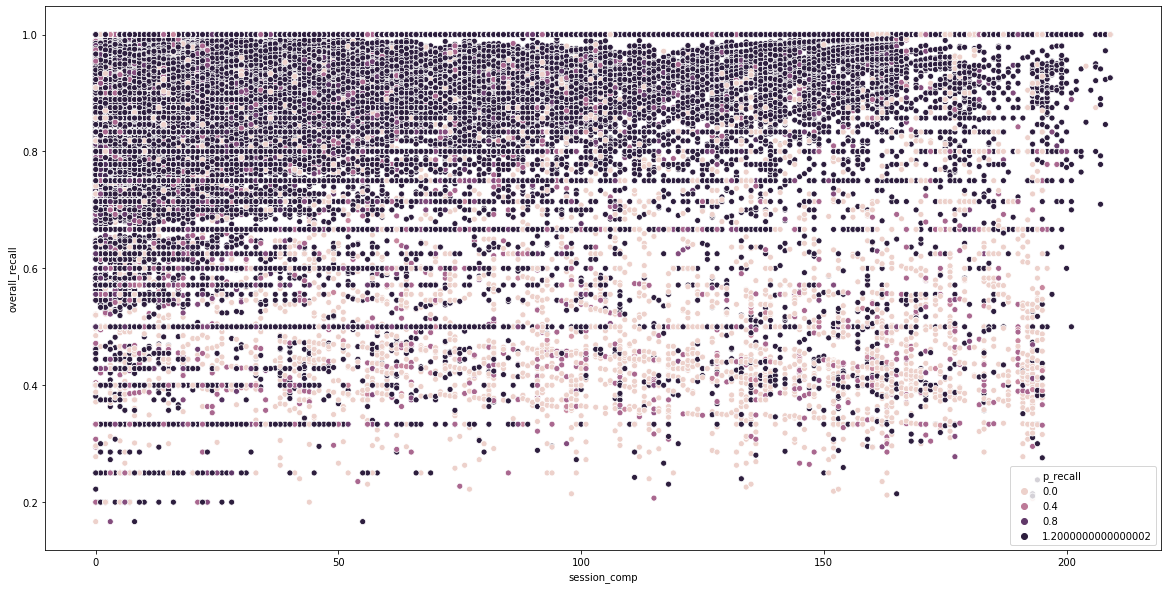

In [414]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= it_learn_eng.session_comp, y = it_learn_eng.overall_recall, hue = it_learn_eng.p_recall)

In [415]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'session_comp', y = 'overall_recall', hue = 'p_recall', size = 'delta', sizes=(40, 400), alpha=.5, data = it_learn_eng)



Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

In [416]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'delta', y = 'overall_recall', hue = 'p_recall', data = it_learn_eng)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x118dab6a8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

In [417]:
conditions = [
    it_learn_eng['p_recall']>it_learn_eng['overall_recall'], 
    it_learn_eng['p_recall']==it_learn_eng['overall_recall'], 
    it_learn_eng['p_recall']<it_learn_eng['overall_recall']]
choices = ['improve', 'same', 'worsen']
it_learn_eng['improvement'] = np.select(conditions, choices)

/Users/KateChristensen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [418]:
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
136      1.00  1362082525  610672  u:hX-p                en          it   
137      1.00  1362082525     271  u:hX-p                en          it   
138      1.00  1362082525   92504  u:hX-p                en          it   
139      0.75  1362082525    5265  u:hX-p                en          it   
140      1.00  1362082525   92504  u:hX-p                en          it   

                            lexeme_id                     lexeme_string  \
136  390ca9c2868c14c5616c460e4f31762c                women/woman<n><pl>   
137  b968b069e4e2c04848e9f8924e34c031  we/prpers<prn><subj><p1><mf><pl>   
138  efc2c65bd3a2ab7e0e2d4db65e290699            read/read<vblex><pres>   
139  e16c578226476ae646530b6356f9b0ad        newspaper/newspaper<n><sg>   
140  b573a2ebb834b1346202143003738756                 girls/girl<n><pl>   

     history_seen  history_correct  session_seen  session_correct  course_num  \
136            36               36             3                3           5   
137            76               67             4                4           5   
138            61               54             6                6           5   
139            42               39             4                3           5   
140            28               22             2                2           5   

     overall_recall  session-overall  session_id  session_comp improvement  
136        1.000000         0.000000           0             0        same  
137        0.881579         0.118421           0             0     improve  
138        0.885246         0.114754           0             0     improve  
139        0.928571        -0.178571           0             0      worsen  
140        0.785714         0.214286           0             0     improve

In [419]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'session_comp', y = 'overall_recall', hue = 'improvement', 
                alpha=.7, data = it_learn_eng, palette="husl")



Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x118dab6a8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

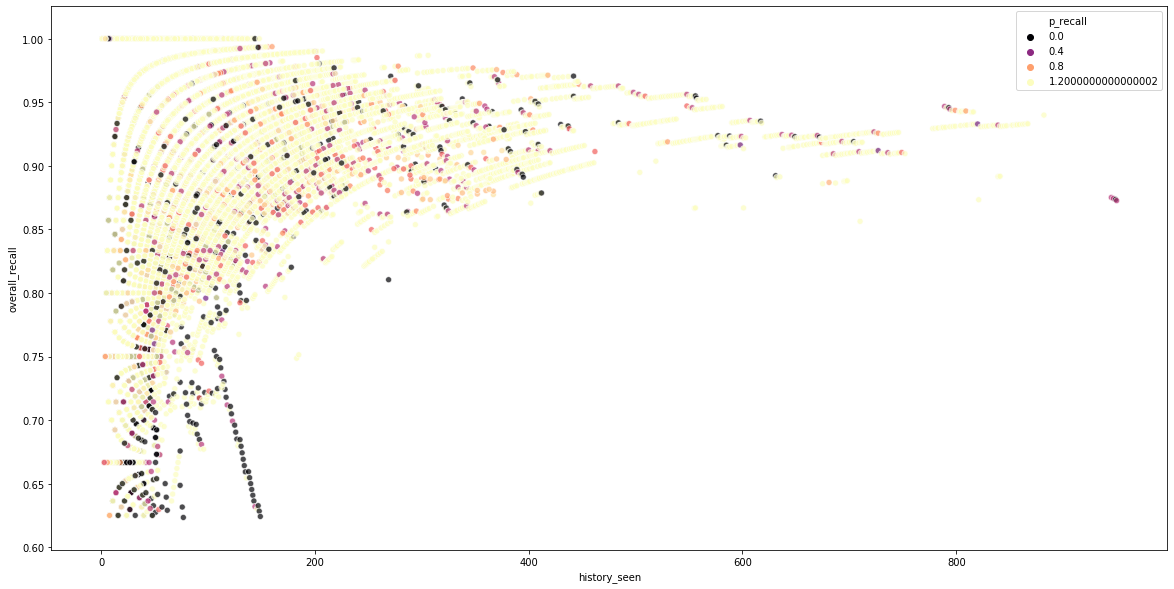

In [687]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'history_seen', y = 'overall_recall', hue = 'p_recall', 
                alpha=.7, data = it_learn_eng, palette="magma")

In [422]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'delta', y = 'overall_recall', hue = 'improvement', 
                alpha=.7, data = it_learn_eng, palette="husl")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x118dab6a8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

In [423]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'p_recall', y = 'overall_recall', hue = 'improvement', 
                alpha=.7, data = it_learn_eng, palette="husl")

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x118dab6a8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11900c268> (for post_execute):


KeyboardInterrupt: 

In [424]:
it_learn_eng.shape

(424152, 18)

In [425]:
from pandas import get_dummies

In [426]:
pd.get_dummies(it_learn_eng.improvement)

improve  same  worsen
136             0     1       0
137             1     0       0
138             1     0       0
139             0     0       1
140             1     0       0
141             1     0       0
142             0     0       1
771             0     0       1
772             1     0       0
773             0     1       0
774             0     0       1
775             1     0       0
776             0     1       0
777             0     1       0
778             0     1       0
811             0     1       0
812             0     1       0
813             1     0       0
814             0     1       0
815             0     0       1
816             1     0       0
817             1     0       0
818             1     0       0
819             0     0       1
820             1     0       0
821             1     0       0
822             0     1       0
823             0     1       0
824             0     1       0
825             1     0       0
...           ...   ...     ...
12853245        0     1       0
12853623        1     0       0
12853624        1     0       0
12853625        1     0       0
12853626        1     0       0
12853627        1     0       0
12853628        0     1       0
12853629        1     0       0
12853630        1     0       0
12853631        1     0       0
12853632        1     0       0
12853633        1     0       0
12853634        1     0       0
12853635        0     1       0
12853636        1     0       0
12853637        1     0       0
12853638        1     0       0
12853639        1     0       0
12853640        1     0       0
12853641        1     0       0
12853682        0     1       0
12853683        0     0       1
12853684        1     0       0
12854219        0     1       0
12854220        1     0       0
12854221        1     0       0
12854222        0     0       1
12854223        0     1       0
12854224        0     0       1
12854225        1     0       0

[424152 rows x 3 columns]

In [427]:
it_learn_eng = pd.concat([it_learn_eng, pd.get_dummies(it_learn_eng.improvement)], axis=1)

In [688]:
it_learn_eng.loc[it_learn_eng.overall_recall<0.6]

Empty DataFrame
Columns: [p_recall, timestamp, delta, user_id, lexeme_id, lexeme_string, history_seen, session_seen, overall_recall, session_id, session_comp, word_len, noun, plural, verb, past, adj, adv, determiner, preposition, singular, overall_z_score]
Index: []

[0 rows x 22 columns]

In [ ]:
# it_learn_eng = it_learn_eng.drop(it_learn_eng[(it_learn_eng.history_seen > 200) & (it_learn_eng.overall_recall < 0.6)].index)

In [879]:
it_learn_eng_means = it_learn_eng.groupby(['lexeme_id', 'session_comp']).mean()
it_learn_eng_means.head()


p_recall     timestamp  \
lexeme_id                        session_comp                           
000f3063358c188d171d903ec5a7855c 0             0.666667  1.362592e+09   
                                 1             1.000000  1.362210e+09   
                                 2             1.000000  1.362168e+09   
                                 5             1.000000  1.362612e+09   
                                 7             1.000000  1.362874e+09   

                                                       delta  history_seen  \
lexeme_id                        session_comp                                
000f3063358c188d171d903ec5a7855c 0             812152.666667           6.0   
                                 1              52957.000000           4.5   
                                 2             162772.000000           7.0   
                                 5             708021.000000           3.0   
                                 7              58354.000000           6.0   

                                               session_seen  overall_recall  \
lexeme_id                        session_comp                                 
000f3063358c188d171d903ec5a7855c 0                      1.0        0.775253   
                                 1                      1.0        0.666667   
                                 2                      1.0        0.714286   
                                 5                      1.0        0.666667   
                                 7                      2.0        0.833333   

                                                 session_id  word_len  noun  \
lexeme_id                        session_comp                                 
000f3063358c188d171d903ec5a7855c 0             13322.666667       6.0   1.0   
                                 1              3258.000000       6.0   1.0   
                                 2              2346.000000       6.0   1.0   
                                 5             14353.000000       6.0   1.0   
                                 7             21670.000000       6.0   1.0   

                                               plural  verb  past  adj  adv  \
lexeme_id                        session_comp                                 
000f3063358c188d171d903ec5a7855c 0                0.0   0.0   0.0  0.0  0.0   
                                 1                0.0   0.0   0.0  0.0  0.0   
                                 2                0.0   0.0   0.0  0.0  0.0   
                                 5                0.0   0.0   0.0  0.0  0.0   
                                 7                0.0   0.0   0.0  0.0  0.0   

                                               determiner  preposition  \
lexeme_id                        session_comp                            
000f3063358c188d171d903ec5a7855c 0                    0.0          0.0   
                                 1                    0.0          0.0   
                                 2                    0.0          0.0   
                                 5                    0.0          0.0   
                                 7                    0.0          0.0   

                                               singular  overall_z_score  
lexeme_id                        session_comp                             
000f3063358c188d171d903ec5a7855c 0                  1.0        -0.353192  
                                 1                  1.0        -1.163020  
                                 2                  1.0        -0.807880  
                                 5                  1.0        -1.163020  
                                 7                  1.0         0.079971

In [880]:
it_learn_eng_means.reset_index(inplace=True)

In [881]:
it_learn_eng_means.shape

(24283, 20)

In [883]:
it_learn_eng_means.head()

lexeme_id  session_comp  p_recall     timestamp  \
0  000f3063358c188d171d903ec5a7855c             0  0.666667  1.362592e+09   
1  000f3063358c188d171d903ec5a7855c             1  1.000000  1.362210e+09   
2  000f3063358c188d171d903ec5a7855c             2  1.000000  1.362168e+09   
3  000f3063358c188d171d903ec5a7855c             5  1.000000  1.362612e+09   
4  000f3063358c188d171d903ec5a7855c             7  1.000000  1.362874e+09   

           delta  history_seen  session_seen  overall_recall    session_id  \
0  812152.666667           6.0           1.0        0.775253  13322.666667   
1   52957.000000           4.5           1.0        0.666667   3258.000000   
2  162772.000000           7.0           1.0        0.714286   2346.000000   
3  708021.000000           3.0           1.0        0.666667  14353.000000   
4   58354.000000           6.0           2.0        0.833333  21670.000000   

   word_len  noun  plural  verb  past  adj  adv  determiner  preposition  \
0       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
1       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
2       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
3       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
4       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   

   singular  overall_z_score  
0       1.0        -0.353192  
1       1.0        -1.163020  
2       1.0        -0.807880  
3       1.0        -1.163020  
4       1.0         0.079971

In [882]:
it_learn_eng_means = it_learn_eng_means[it_learn_eng_means['history_seen']<500]

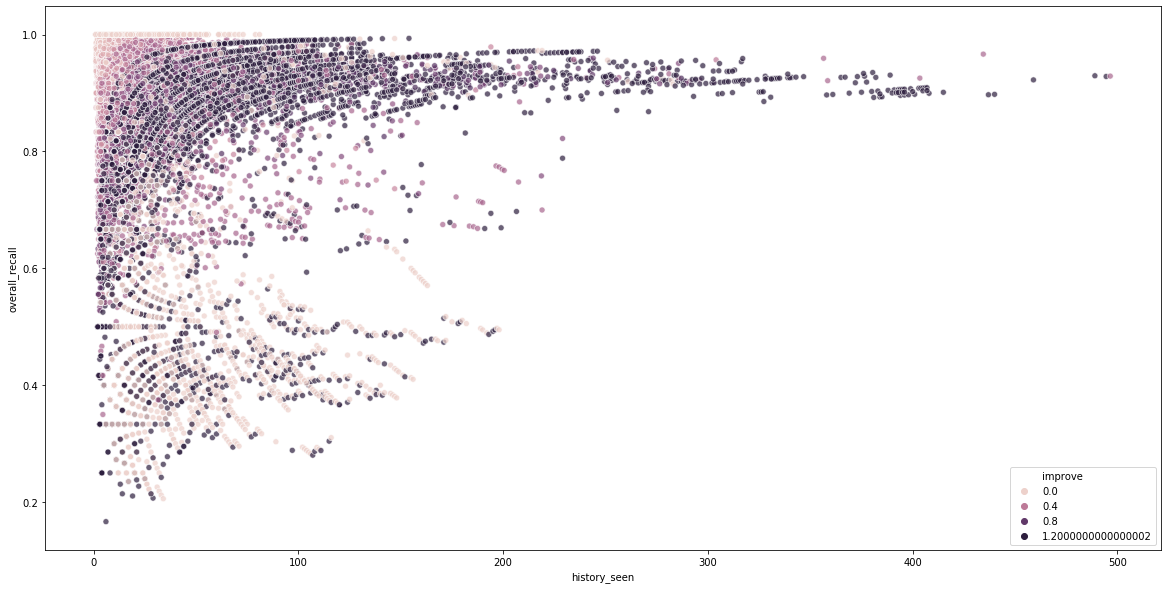

In [452]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x= 'history_seen', y = 'overall_recall', hue = 'improve', 
                alpha=.7, data = it_learn_eng_means)

In [727]:
it_learn_eng_means.drop(columns = ['course_num'], inplace=True)

/Users/KateChristensen/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [728]:
it_learn_eng_means.corr()

session_comp  p_recall  timestamp     delta  history_seen  \
session_comp         1.000000 -0.146634   0.382259 -0.183737      0.356518   
p_recall            -0.146634  1.000000   0.006458  0.002376     -0.113473   
timestamp            0.382259  0.006458   1.000000 -0.042618      0.109775   
delta               -0.183737  0.002376  -0.042618  1.000000     -0.146000   
history_seen         0.356518 -0.113473   0.109775 -0.146000      1.000000   
history_correct      0.332106 -0.037899   0.105469 -0.145845      0.957699   
session_seen         0.059391  0.064515   0.055839  0.012110      0.039836   
session_correct      0.003046  0.407008   0.052765  0.010621     -0.005447   
overall_recall      -0.198215  0.357943  -0.002443  0.076339     -0.191065   
session-overall     -0.039986  0.843830   0.008182 -0.041377     -0.009291   
session_id           0.375016  0.005996   0.999089 -0.038069      0.107735   

                 history_correct  session_seen  session_correct  \
session_comp            0.332106      0.059391         0.003046   
p_recall               -0.037899      0.064515         0.407008   
timestamp               0.105469      0.055839         0.052765   
delta                  -0.145845      0.012110         0.010621   
history_seen            0.957699      0.039836        -0.005447   
history_correct         1.000000      0.055362         0.038246   
session_seen            0.055362      1.000000         0.923012   
session_correct         0.038246      0.923012         1.000000   
overall_recall         -0.073936     -0.008818         0.126032   
session-overall         0.002714      0.072779         0.354741   
session_id              0.103116      0.056053         0.052765   

                 overall_recall  session-overall  session_id  
session_comp          -0.198215        -0.039986    0.375016  
p_recall               0.357943         0.843830    0.005996  
timestamp             -0.002443         0.008182    0.999089  
delta                  0.076339        -0.041377   -0.038069  
history_seen          -0.191065        -0.009291    0.107735  
history_correct       -0.073936         0.002714    0.103116  
session_seen          -0.008818         0.072779    0.056053  
session_correct        0.126032         0.354741    0.052765  
overall_recall         1.000000        -0.199014   -0.002138  
session-overall       -0.199014         1.000000    0.007521  
session_id            -0.002138         0.007521    1.000000

In [884]:
it_learn_eng_means.drop(columns=['timestamp', 'session_id'], inplace= True)

In [456]:
it_learn_eng_means.drop(columns=['worsen'], inplace= True)

In [885]:
it_learn_eng_means.drop(columns = ['history_correct', 'session_correct'], inplace= True)

KeyError: "['history_correct' 'session_correct'] not found in axis"

In [464]:
it_learn_eng_means.drop(columns = ['session-overall'], inplace= True)

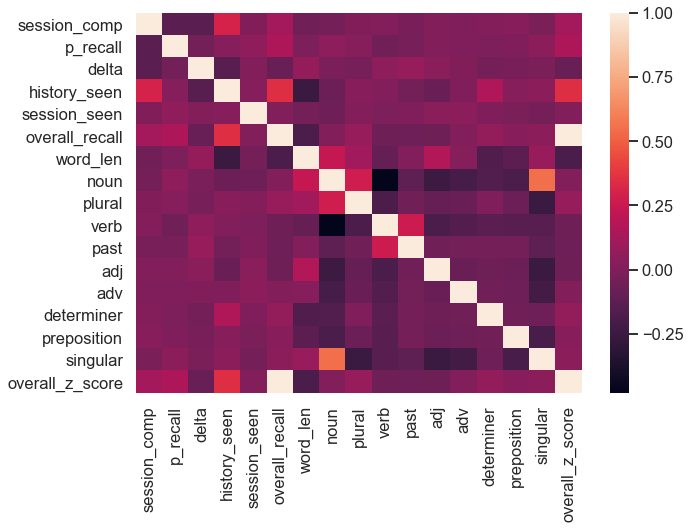

In [886]:
f,ax = plt.subplots(figsize = (10,7))
sns.heatmap(it_learn_eng_means.corr())

In [897]:
it_learn_eng_means.shape

(24276, 18)

In [898]:
out_ind_list = it_learn_eng_means.loc[(it_learn_eng_means.history_seen>300)&(it_learn_eng_means.overall_recall<0.6)].index
it_learn_eng_means.drop(out)

6

In [981]:
low_hist = it_learn_eng_means.loc[(it_learn_eng_means.history_seen<100)]

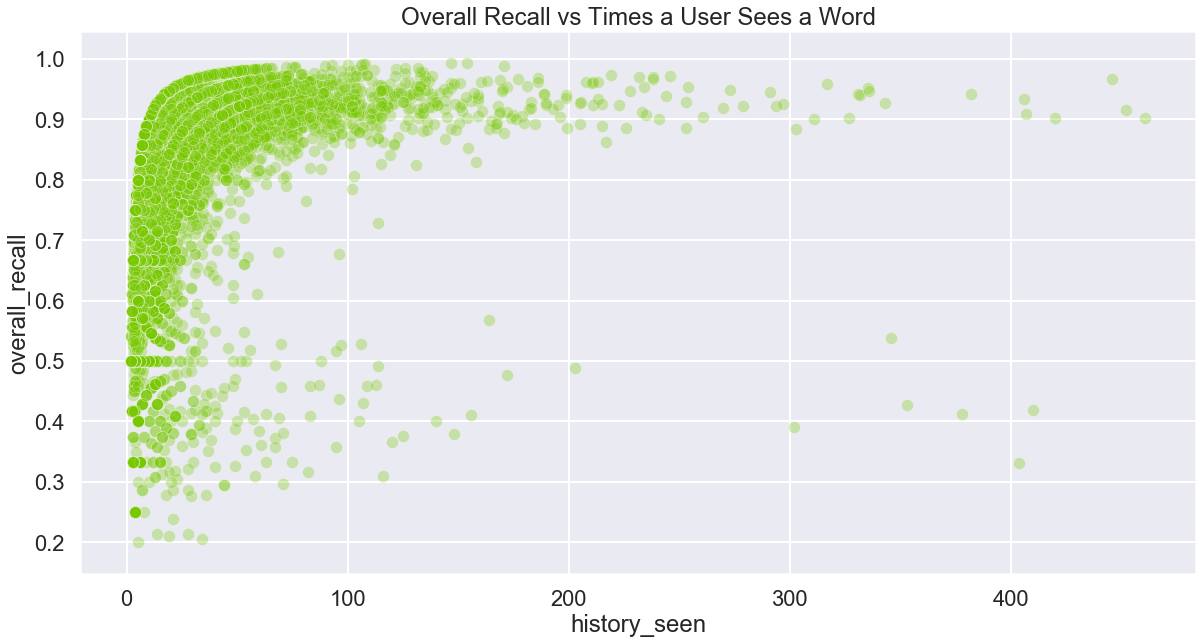

In [1186]:
sns.set_context("poster")
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x = it_learn_eng_means.history_seen, 
                y = it_learn_eng_means.overall_recall,
               alpha = 0.3,
               color = "#77C800")
plt.title("Overall Recall vs Times a User Sees a Word")
plt.savefig("Overall_Recall_vs_History_Seen.png")

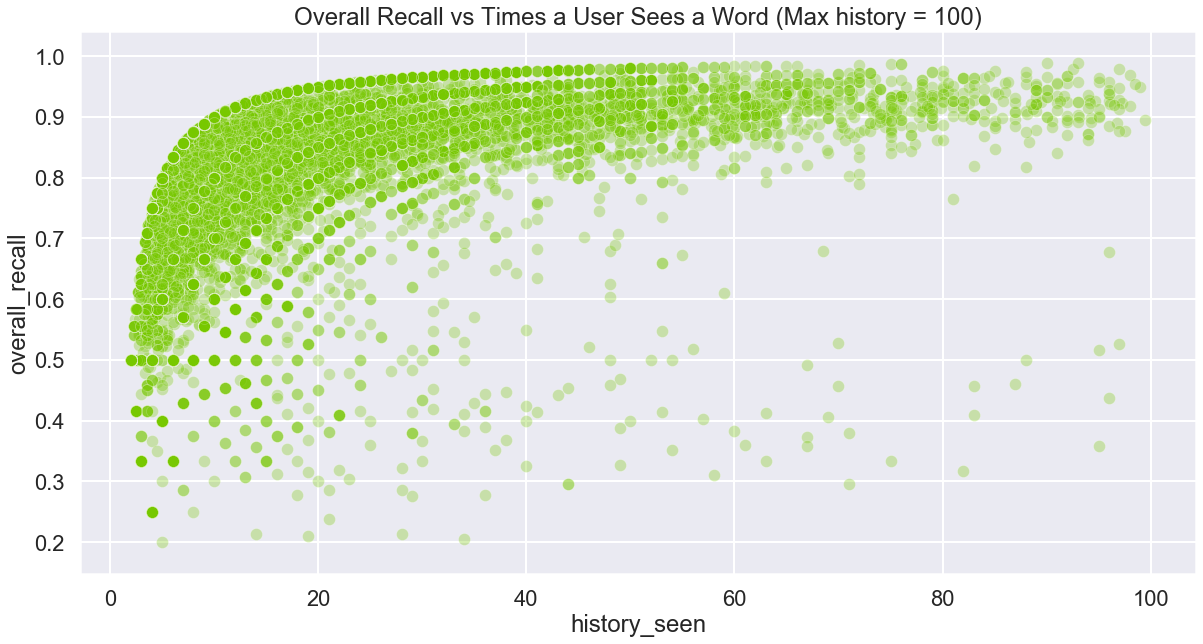

In [1185]:
sns.set_context("poster")
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x = low_hist.history_seen, 
                y = low_hist.overall_recall,
               alpha = 0.3,
               color = "#77C800")
plt.title("Overall Recall vs Times a User Sees a Word (Max history = 100)")
plt.savefig("Max_100_Overall_Recall_vs_History_Seen.png")

In [1167]:
low_delta = it_learn_eng_means.loc[(it_learn_eng_means.delta<5000000)]

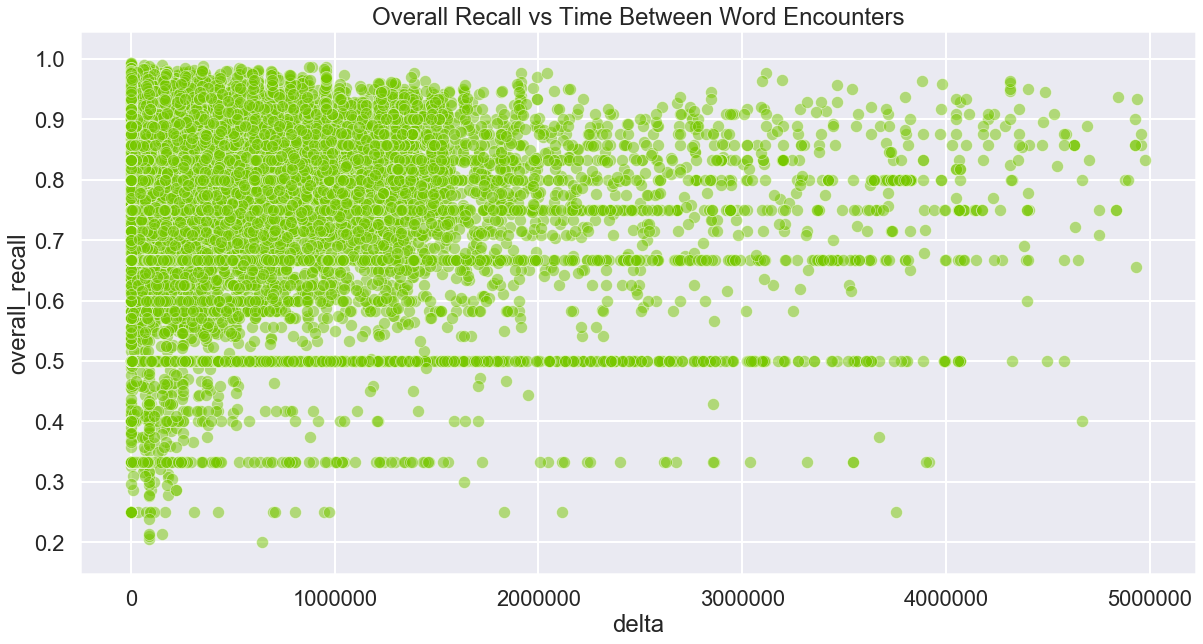

<Figure size 432x288 with 0 Axes>

In [1183]:
sns.set_context("poster")
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x = "delta", 
            y = "overall_recall",
          data = low_delta, alpha=0.5,
               color = "#77C800")
plt.title("Overall Recall vs Time Between Word Encounters")
plt.show()
plt.savefig("delta_scatter.png")

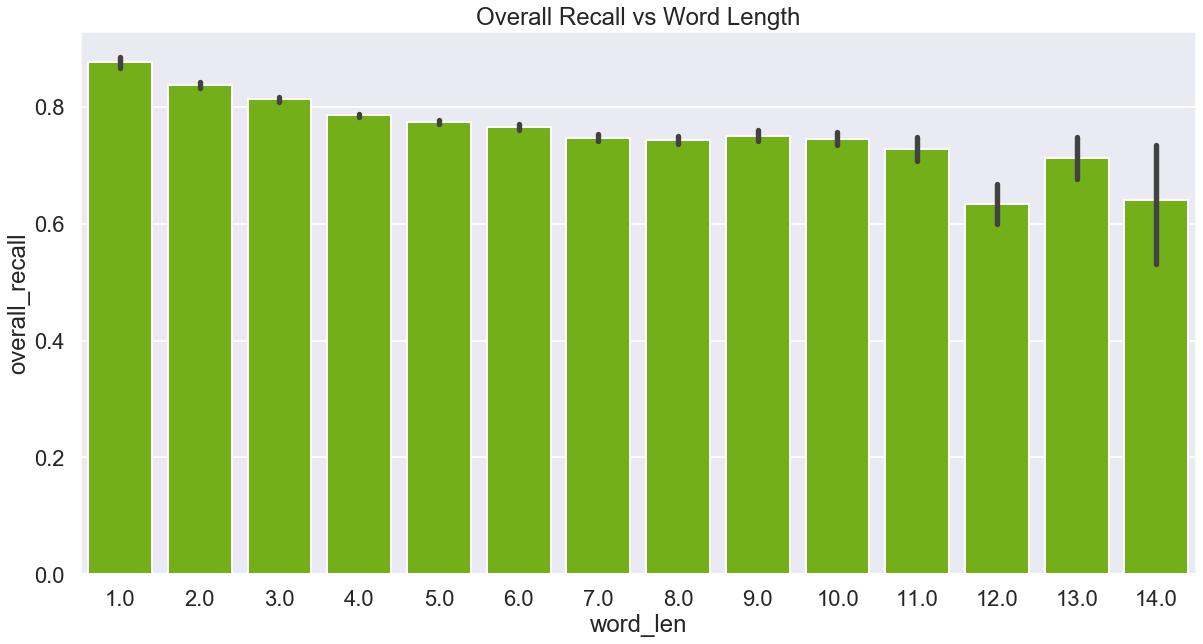

<Figure size 432x288 with 0 Axes>

In [1190]:
sns.set_context("poster")
f,ax = plt.subplots(figsize = (20,10))
sns.barplot(x = "word_len", 
            y = "overall_recall",
          data = it_learn_eng_means,
               color = "#77C800")
plt.title("Overall Recall vs Word Length")
plt.show()
plt.savefig("word_bar.png")

In [969]:
list(it_learn_eng_means.session_seen).count(0.0)

0

Text(0.5, 1.0, 'Overall Recall vs Times a User Sees a Word')

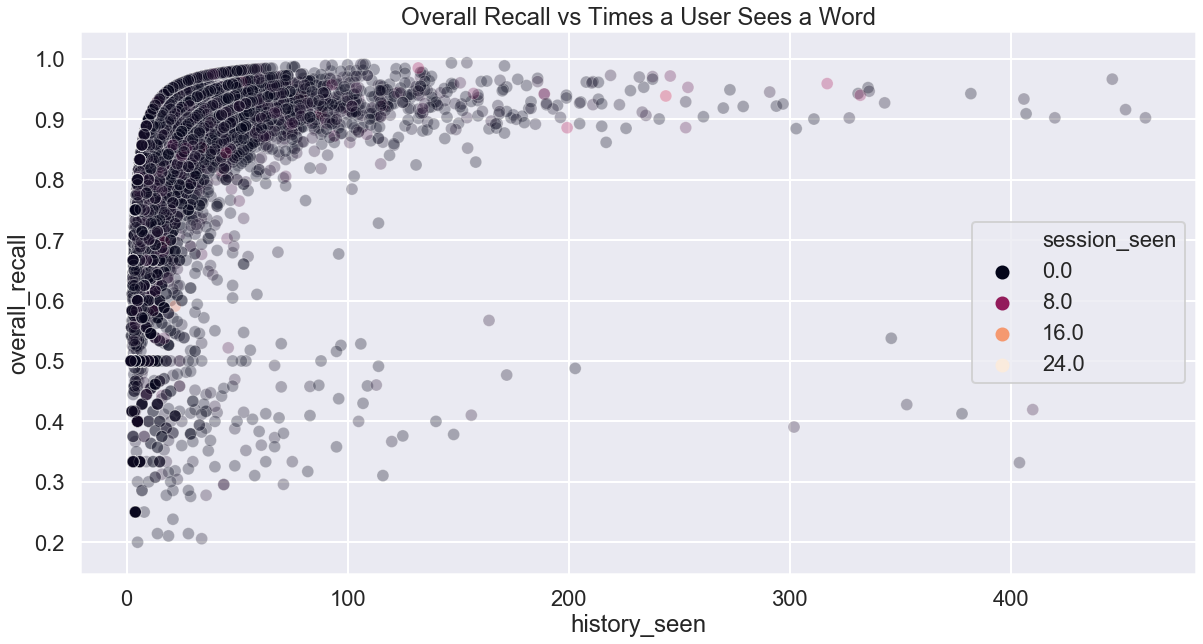

In [956]:
sns.set_context("poster")
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x = it_learn_eng_means.history_seen, 
                y = it_learn_eng_means.overall_recall,
                hue = it_learn_eng_means.session_seen,
               alpha = 0.3,
               palette = "rocket")
plt.title("Overall Recall vs Times a User Sees a Word")
# plt.savefig("Overall_Recall_vs_History_Seen.png")

Text(0.5, 1.0, 'Overall Recall vs Times a User Sees a Word in One Lesson')

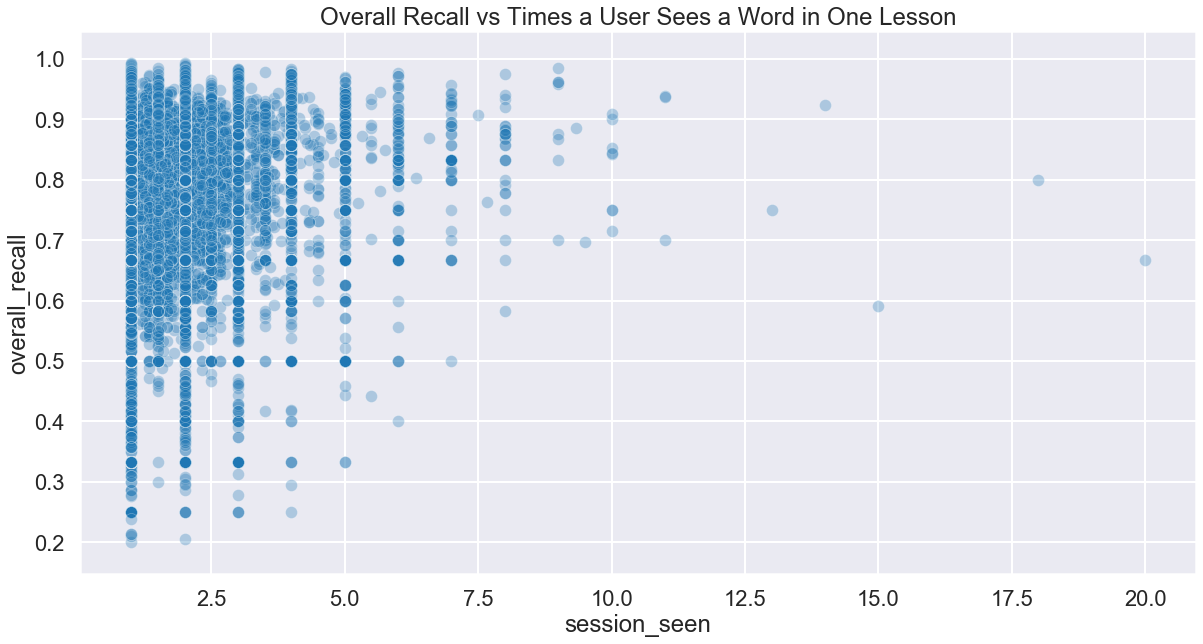

In [951]:
sns.set_context("poster")
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x = it_learn_eng_means.session_seen, 
                y = it_learn_eng_means.overall_recall,
               alpha = 0.3)
plt.title("Overall Recall vs Times a User Sees a Word in One Lesson")
# plt.savefig("Overall_Recall_vs_History_Seen.png")

In [ ]:
plt.plt(x=)

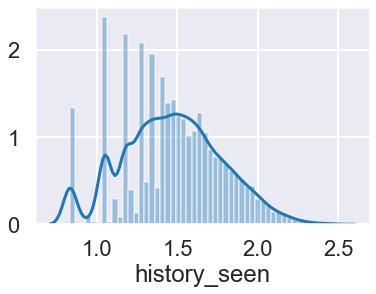

In [922]:
sns.distplot(np.sqrt(np.log(it_learn_eng_means.history_seen)))

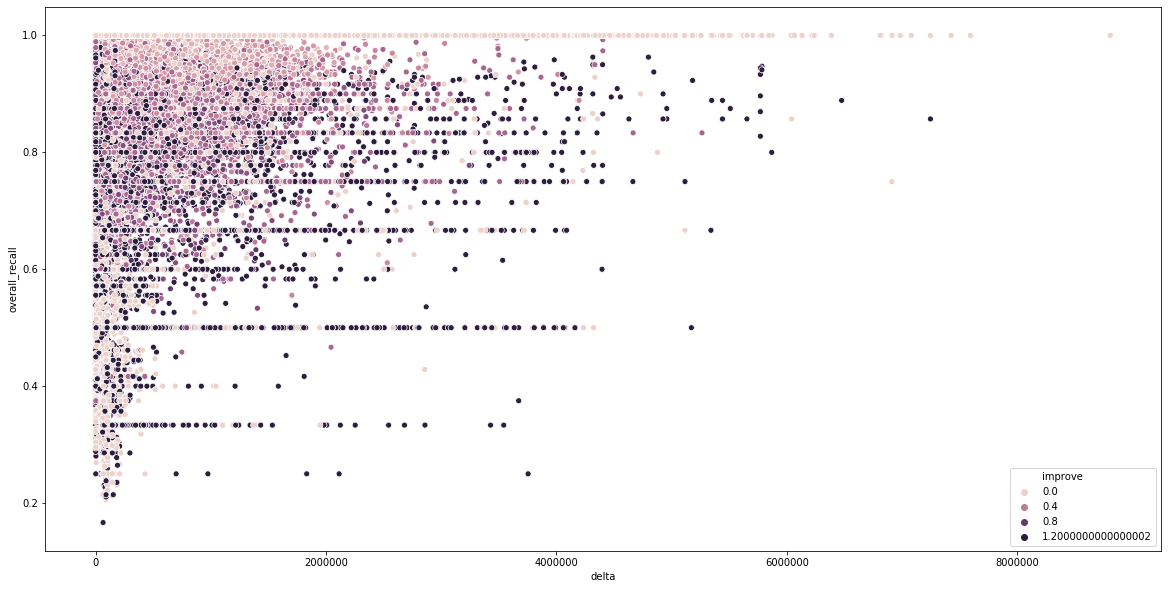

In [440]:
f,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x = it_learn_eng_means.delta, 
                y = it_learn_eng_means.overall_recall, 
                hue = it_learn_eng_means.improve)

In [891]:
features = [col for col in it_learn_eng_means.columns if col != 'overall_recall' and it_learn_eng_means[col].dtype in [np.float64, np.int64]]
X = it_learn_eng_means[features]
y = it_learn_eng_means.overall_recall


In [508]:
import statsmodels.api as sm

In [984]:
it_learn_eng_means.shape

(24276, 17)

In [986]:
features = [col for col in it_learn_eng_means.columns if col != 'overall_recall' and it_learn_eng_means[col].dtype in [np.float64, np.int64]]
X = it_learn_eng_means[features]
y = it_learn_eng_means.overall_recall
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         overall_recall   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          3.237e+04
Date:                Wed, 02 Oct 2019   Prob (F-statistic):                        0.00
Time:                        14:23:12   Log-Likelihood:                          8228.2
No. Observations:               24276   AIC:                                 -1.643e+04
Df Residuals:                   24261   BIC:                                 -1.631e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
session_comp     0.0008   2.73e-05     27.955      0.000       0.001       0.001
p_recall         0.3930      0.004    110.486      0.000       0.386       0.400
delta         2.174e-08   1.48e-09     14.656      0.000    1.88e-08    2.46e-08
history_seen     0.0024   5.18e-05     46.656      0.000       0.002       0.003
session_seen     0.0335      0.001     31.742      0.000       0.031       0.036
word_len         0.0182      0.001     31.606      0.000       0.017       0.019
noun             0.1278      0.004     29.837      0.000       0.119       0.136
plural           0.1004      0.005     20.216      0.000       0.091       0.110
verb             0.1797      0.004     46.751      0.000       0.172       0.187
past             0.0048      0.007      0.689      0.491      -0.009       0.019
adj              0.1602      0.005     30.103      0.000       0.150       0.171
adv              0.2017      0.006     36.241      0.000       0.191       0.213
determiner       0.2138      0.006     34.878      0.000       0.202       0.226
preposition      0.2341      0.006     41.036      0.000       0.223       0.245
singular         0.0692      0.003     20.791      0.000       0.063       0.076
==============================================================================
Omnibus:                     1283.039   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4334.473
Skew:                          -0.184   Prob(JB):                         0.00
Kurtosis:                       5.037   Cond. No.                     7.31e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [529]:
len(list(it_learn_eng.lexeme_string)[0].split('/')[0])

5

In [732]:
word_len = [len(word.split('/')[0]) for word in list(it_learn_eng.lexeme_string)]

In [733]:
it_learn_eng['word_len'] = word_len
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
3004633       1.0  1362330934  252471   u:HDJ                en          it   
3004634       0.5  1362330934  252471   u:HDJ                en          it   
3004635       1.0  1362330934  252471   u:HDJ                en          it   
3004636       1.0  1362330934  252471   u:HDJ                en          it   
3004637       1.0  1362330934  252471   u:HDJ                en          it   

                                lexeme_id       lexeme_string  history_seen  \
3004633  dbb7591f283beec7f6ef3b4a07cc05a3      even/even<adv>            11   
3004634  22ae70952558ea3b3e01f94ce3a50bbd      just/just<adv>             8   
3004635  cff2d760888774c8011ed92d80ae3312  always/always<adv>            15   
3004636  4a4c57cc0632cb297e94efc594db617a      only/only<adv>            14   
3004637  b7734a9e942f3e39f2d20b72bb598add      once/once<adv>            11   

         history_correct  session_seen  session_correct  course_num  \
3004633               10             3                3           5   
3004634                4             2                1           5   
3004635               15             3                3           5   
3004636               13             3                3           5   
3004637               10             4                4           5   

         overall_recall  session-overall  session_id  session_comp  word_len  
3004633        0.909091         0.090909        5934             0         4  
3004634        0.500000         0.000000        5934             0         4  
3004635        1.000000         0.000000        5934             0         6  
3004636        0.928571         0.071429        5934             0         4  
3004637        0.909091         0.090909        5934             0         4

In [534]:
it_learn_eng.drop(columns=['improve', 'same', 'worsen'], inplace = True)

In [535]:
it_learn_eng.drop(columns=['improvement'], inplace = True)

In [734]:
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
3004633       1.0  1362330934  252471   u:HDJ                en          it   
3004634       0.5  1362330934  252471   u:HDJ                en          it   
3004635       1.0  1362330934  252471   u:HDJ                en          it   
3004636       1.0  1362330934  252471   u:HDJ                en          it   
3004637       1.0  1362330934  252471   u:HDJ                en          it   

                                lexeme_id       lexeme_string  history_seen  \
3004633  dbb7591f283beec7f6ef3b4a07cc05a3      even/even<adv>            11   
3004634  22ae70952558ea3b3e01f94ce3a50bbd      just/just<adv>             8   
3004635  cff2d760888774c8011ed92d80ae3312  always/always<adv>            15   
3004636  4a4c57cc0632cb297e94efc594db617a      only/only<adv>            14   
3004637  b7734a9e942f3e39f2d20b72bb598add      once/once<adv>            11   

         history_correct  session_seen  session_correct  course_num  \
3004633               10             3                3           5   
3004634                4             2                1           5   
3004635               15             3                3           5   
3004636               13             3                3           5   
3004637               10             4                4           5   

         overall_recall  session-overall  session_id  session_comp  word_len  
3004633        0.909091         0.090909        5934             0         4  
3004634        0.500000         0.000000        5934             0         4  
3004635        1.000000         0.000000        5934             0         6  
3004636        0.928571         0.071429        5934             0         4  
3004637        0.909091         0.090909        5934             0         4

In [735]:
noun = [1 if "<n>" in word else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['noun'] = noun
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
3004633       1.0  1362330934  252471   u:HDJ                en          it   
3004634       0.5  1362330934  252471   u:HDJ                en          it   
3004635       1.0  1362330934  252471   u:HDJ                en          it   
3004636       1.0  1362330934  252471   u:HDJ                en          it   
3004637       1.0  1362330934  252471   u:HDJ                en          it   

                                lexeme_id       lexeme_string  history_seen  \
3004633  dbb7591f283beec7f6ef3b4a07cc05a3      even/even<adv>            11   
3004634  22ae70952558ea3b3e01f94ce3a50bbd      just/just<adv>             8   
3004635  cff2d760888774c8011ed92d80ae3312  always/always<adv>            15   
3004636  4a4c57cc0632cb297e94efc594db617a      only/only<adv>            14   
3004637  b7734a9e942f3e39f2d20b72bb598add      once/once<adv>            11   

         history_correct  session_seen  session_correct  course_num  \
3004633               10             3                3           5   
3004634                4             2                1           5   
3004635               15             3                3           5   
3004636               13             3                3           5   
3004637               10             4                4           5   

         overall_recall  session-overall  session_id  session_comp  word_len  \
3004633        0.909091         0.090909        5934             0         4   
3004634        0.500000         0.000000        5934             0         4   
3004635        1.000000         0.000000        5934             0         6   
3004636        0.928571         0.071429        5934             0         4   
3004637        0.909091         0.090909        5934             0         4   

         noun  
3004633     0  
3004634     0  
3004635     0  
3004636     0  
3004637     0

In [736]:
plural = [1 if "<pl>" in word else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['plural'] = plural
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
3004633       1.0  1362330934  252471   u:HDJ                en          it   
3004634       0.5  1362330934  252471   u:HDJ                en          it   
3004635       1.0  1362330934  252471   u:HDJ                en          it   
3004636       1.0  1362330934  252471   u:HDJ                en          it   
3004637       1.0  1362330934  252471   u:HDJ                en          it   

                                lexeme_id       lexeme_string  history_seen  \
3004633  dbb7591f283beec7f6ef3b4a07cc05a3      even/even<adv>            11   
3004634  22ae70952558ea3b3e01f94ce3a50bbd      just/just<adv>             8   
3004635  cff2d760888774c8011ed92d80ae3312  always/always<adv>            15   
3004636  4a4c57cc0632cb297e94efc594db617a      only/only<adv>            14   
3004637  b7734a9e942f3e39f2d20b72bb598add      once/once<adv>            11   

         history_correct  session_seen  session_correct  course_num  \
3004633               10             3                3           5   
3004634                4             2                1           5   
3004635               15             3                3           5   
3004636               13             3                3           5   
3004637               10             4                4           5   

         overall_recall  session-overall  session_id  session_comp  word_len  \
3004633        0.909091         0.090909        5934             0         4   
3004634        0.500000         0.000000        5934             0         4   
3004635        1.000000         0.000000        5934             0         6   
3004636        0.928571         0.071429        5934             0         4   
3004637        0.909091         0.090909        5934             0         4   

         noun  plural  
3004633     0       0  
3004634     0       0  
3004635     0       0  
3004636     0       0  
3004637     0       0

In [737]:
verb = [1 if "<v" in word else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['verb'] = verb
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
3004633       1.0  1362330934  252471   u:HDJ                en          it   
3004634       0.5  1362330934  252471   u:HDJ                en          it   
3004635       1.0  1362330934  252471   u:HDJ                en          it   
3004636       1.0  1362330934  252471   u:HDJ                en          it   
3004637       1.0  1362330934  252471   u:HDJ                en          it   

                                lexeme_id       lexeme_string  history_seen  \
3004633  dbb7591f283beec7f6ef3b4a07cc05a3      even/even<adv>            11   
3004634  22ae70952558ea3b3e01f94ce3a50bbd      just/just<adv>             8   
3004635  cff2d760888774c8011ed92d80ae3312  always/always<adv>            15   
3004636  4a4c57cc0632cb297e94efc594db617a      only/only<adv>            14   
3004637  b7734a9e942f3e39f2d20b72bb598add      once/once<adv>            11   

         history_correct  ...  session_correct  course_num  overall_recall  \
3004633               10  ...                3           5        0.909091   
3004634                4  ...                1           5        0.500000   
3004635               15  ...                3           5        1.000000   
3004636               13  ...                3           5        0.928571   
3004637               10  ...                4           5        0.909091   

         session-overall  session_id  session_comp  word_len  noun  plural  \
3004633         0.090909        5934             0         4     0       0   
3004634         0.000000        5934             0         4     0       0   
3004635         0.000000        5934             0         6     0       0   
3004636         0.071429        5934             0         4     0       0   
3004637         0.090909        5934             0         4     0       0   

         verb  
3004633     0  
3004634     0  
3004635     0  
3004636     0  
3004637     0  

[5 rows x 21 columns]

In [738]:
words = [word.split('/')[0] for word in list(it_learn_eng.lexeme_string)]
"past" in words

False

In [739]:
past = [1 if "past" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['past'] = past
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
3004633       1.0  1362330934  252471   u:HDJ                en          it   
3004634       0.5  1362330934  252471   u:HDJ                en          it   
3004635       1.0  1362330934  252471   u:HDJ                en          it   
3004636       1.0  1362330934  252471   u:HDJ                en          it   
3004637       1.0  1362330934  252471   u:HDJ                en          it   

                                lexeme_id       lexeme_string  history_seen  \
3004633  dbb7591f283beec7f6ef3b4a07cc05a3      even/even<adv>            11   
3004634  22ae70952558ea3b3e01f94ce3a50bbd      just/just<adv>             8   
3004635  cff2d760888774c8011ed92d80ae3312  always/always<adv>            15   
3004636  4a4c57cc0632cb297e94efc594db617a      only/only<adv>            14   
3004637  b7734a9e942f3e39f2d20b72bb598add      once/once<adv>            11   

         history_correct  ...  course_num  overall_recall  session-overall  \
3004633               10  ...           5        0.909091         0.090909   
3004634                4  ...           5        0.500000         0.000000   
3004635               15  ...           5        1.000000         0.000000   
3004636               13  ...           5        0.928571         0.071429   
3004637               10  ...           5        0.909091         0.090909   

         session_id  session_comp  word_len  noun  plural  verb  past  
3004633        5934             0         4     0       0     0     0  
3004634        5934             0         4     0       0     0     0  
3004635        5934             0         6     0       0     0     0  
3004636        5934             0         4     0       0     0     0  
3004637        5934             0         4     0       0     0     0  

[5 rows x 22 columns]

In [740]:
adj = [1 if "<adj>" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['adj'] = adj
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
3004633       1.0  1362330934  252471   u:HDJ                en          it   
3004634       0.5  1362330934  252471   u:HDJ                en          it   
3004635       1.0  1362330934  252471   u:HDJ                en          it   
3004636       1.0  1362330934  252471   u:HDJ                en          it   
3004637       1.0  1362330934  252471   u:HDJ                en          it   

                                lexeme_id       lexeme_string  history_seen  \
3004633  dbb7591f283beec7f6ef3b4a07cc05a3      even/even<adv>            11   
3004634  22ae70952558ea3b3e01f94ce3a50bbd      just/just<adv>             8   
3004635  cff2d760888774c8011ed92d80ae3312  always/always<adv>            15   
3004636  4a4c57cc0632cb297e94efc594db617a      only/only<adv>            14   
3004637  b7734a9e942f3e39f2d20b72bb598add      once/once<adv>            11   

         history_correct  ...  overall_recall  session-overall  session_id  \
3004633               10  ...        0.909091         0.090909        5934   
3004634                4  ...        0.500000         0.000000        5934   
3004635               15  ...        1.000000         0.000000        5934   
3004636               13  ...        0.928571         0.071429        5934   
3004637               10  ...        0.909091         0.090909        5934   

         session_comp  word_len  noun  plural  verb  past  adj  
3004633             0         4     0       0     0     0    0  
3004634             0         4     0       0     0     0    0  
3004635             0         6     0       0     0     0    0  
3004636             0         4     0       0     0     0    0  
3004637             0         4     0       0     0     0    0  

[5 rows x 23 columns]

In [741]:
adv = [1 if "<adv>" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['adv'] = adv
it_learn_eng.head()

p_recall   timestamp   delta user_id learning_language ui_language  \
3004633       1.0  1362330934  252471   u:HDJ                en          it   
3004634       0.5  1362330934  252471   u:HDJ                en          it   
3004635       1.0  1362330934  252471   u:HDJ                en          it   
3004636       1.0  1362330934  252471   u:HDJ                en          it   
3004637       1.0  1362330934  252471   u:HDJ                en          it   

                                lexeme_id       lexeme_string  history_seen  \
3004633  dbb7591f283beec7f6ef3b4a07cc05a3      even/even<adv>            11   
3004634  22ae70952558ea3b3e01f94ce3a50bbd      just/just<adv>             8   
3004635  cff2d760888774c8011ed92d80ae3312  always/always<adv>            15   
3004636  4a4c57cc0632cb297e94efc594db617a      only/only<adv>            14   
3004637  b7734a9e942f3e39f2d20b72bb598add      once/once<adv>            11   

         history_correct  ...  session-overall  session_id  session_comp  \
3004633               10  ...         0.090909        5934             0   
3004634                4  ...         0.000000        5934             0   
3004635               15  ...         0.000000        5934             0   
3004636               13  ...         0.071429        5934             0   
3004637               10  ...         0.090909        5934             0   

         word_len  noun  plural  verb  past  adj  adv  
3004633         4     0       0     0     0    0    1  
3004634         4     0       0     0     0    0    1  
3004635         6     0       0     0     0    0    1  
3004636         4     0       0     0     0    0    1  
3004637         4     0       0     0     0    0    1  

[5 rows x 24 columns]

In [742]:
det = [1 if "<det>" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['determiner'] = det
it_learn_eng.tail()

p_recall   timestamp    delta user_id learning_language ui_language  \
1884302       0.0  1362237485  1883813   u:lo6                en          it   
1884303       1.0  1362237485  1647380   u:lo6                en          it   
1884304       1.0  1362237485  1647109   u:lo6                en          it   
1884305       1.0  1362237485  2583098   u:lo6                en          it   
1884306       1.0  1362237485  2583098   u:lo6                en          it   

                                lexeme_id                       lexeme_string  \
1884302  0a7ad985b6b19b5cfb4723f207220a3d  they/prpers<prn><subj><p3><mf><pl>   
1884303  33a7fd42f74b2d2b1110f1b0c8b6db38                        not/not<adv>   
1884304  5cda37194d9474e70ea2d0f7d4d6beaf             that/that<det><dem><sg>   
1884305  b060304086223feeab02b99b2501276b          that/that<prn><tn><mf><sg>   
1884306  025ab8349ba0caa729c4f12cb47fc3be                       like/like<pr>   

         history_seen  history_correct  ...  session_id  session_comp  \
1884302            35               31  ...        3528             0   
1884303            33               29  ...        3528             0   
1884304            21               13  ...        3528             0   
1884305             9                7  ...        3528             0   
1884306             8                4  ...        3528             0   

         word_len  noun  plural  verb  past  adj  adv  determiner  
1884302         4     0       1     0     0    0    0           0  
1884303         3     0       0     0     0    0    1           0  
1884304         4     0       0     0     0    0    0           1  
1884305         4     0       0     0     0    0    0           0  
1884306         4     0       0     0     0    0    0           0  

[5 rows x 25 columns]

In [743]:
pr = [1 if "<pr>" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['preposition'] = pr
it_learn_eng.tail(10)

p_recall   timestamp    delta user_id learning_language ui_language  \
1884297       0.0  1362237485  2580376   u:lo6                en          it   
1884298       0.0  1362237485  1647109   u:lo6                en          it   
1884299       0.0  1362237485  2575023   u:lo6                en          it   
1884300       0.0  1362237485  2502435   u:lo6                en          it   
1884301       0.0  1362237485  1884061   u:lo6                en          it   
1884302       0.0  1362237485  1883813   u:lo6                en          it   
1884303       1.0  1362237485  1647380   u:lo6                en          it   
1884304       1.0  1362237485  1647109   u:lo6                en          it   
1884305       1.0  1362237485  2583098   u:lo6                en          it   
1884306       1.0  1362237485  2583098   u:lo6                en          it   

                                lexeme_id  \
1884297  10339cc9b10bb1620f7832626dc0e8a7   
1884298  6d4c572af8022cb4784ce0f8898d1905   
1884299  5357ac4c648537594a4822a35835387a   
1884300  e2b48e264e46d96e88977bbdebbe9432   
1884301  7fce5a3c9407811ac7c12885d16df8c4   
1884302  0a7ad985b6b19b5cfb4723f207220a3d   
1884303  33a7fd42f74b2d2b1110f1b0c8b6db38   
1884304  5cda37194d9474e70ea2d0f7d4d6beaf   
1884305  b060304086223feeab02b99b2501276b   
1884306  025ab8349ba0caa729c4f12cb47fc3be   

                                     lexeme_string  history_seen  \
1884297     will/will<vaux><pres><@future_perfect>             2   
1884298                                  to/to<pr>            26   
1884299  chosen/choose<vblex><pp><@future_perfect>             5   
1884300                   expensive/expensive<adj>             3   
1884301                      friends/friend<n><pl>             1   
1884302         they/prpers<prn><subj><p3><mf><pl>            35   
1884303                               not/not<adv>            33   
1884304                    that/that<det><dem><sg>            21   
1884305                 that/that<prn><tn><mf><sg>             9   
1884306                              like/like<pr>             8   

         history_correct  ...  session_comp  word_len  noun  plural  verb  \
1884297                1  ...             0         4     0       0     1   
1884298               22  ...             0         2     0       0     0   
1884299                3  ...             0         6     0       0     1   
1884300                1  ...             0         9     0       0     0   
1884301                1  ...             0         7     1       1     0   
1884302               31  ...             0         4     0       1     0   
1884303               29  ...             0         3     0       0     0   
1884304               13  ...             0         4     0       0     0   
1884305                7  ...             0         4     0       0     0   
1884306                4  ...             0         4     0       0     0   

         past  adj  adv  determiner  preposition  
1884297     0    0    0           0            0  
1884298     0    0    0           0            1  
1884299     0    0    0           0            0  
1884300     0    1    0           0            0  
1884301     0    0    0           0            0  
1884302     0    0    0           0            0  
1884303     0    0    1           0            0  
1884304     0    0    0           1            0  
1884305     0    0    0           0            0  
1884306     0    0    0           0            1  

[10 rows x 26 columns]

In [744]:
sg = [1 if "<sg>" in word.split('/')[1] else 0 for word in list(it_learn_eng.lexeme_string)]
it_learn_eng['singular'] = sg
it_learn_eng.tail(10)

p_recall   timestamp    delta user_id learning_language ui_language  \
1884297       0.0  1362237485  2580376   u:lo6                en          it   
1884298       0.0  1362237485  1647109   u:lo6                en          it   
1884299       0.0  1362237485  2575023   u:lo6                en          it   
1884300       0.0  1362237485  2502435   u:lo6                en          it   
1884301       0.0  1362237485  1884061   u:lo6                en          it   
1884302       0.0  1362237485  1883813   u:lo6                en          it   
1884303       1.0  1362237485  1647380   u:lo6                en          it   
1884304       1.0  1362237485  1647109   u:lo6                en          it   
1884305       1.0  1362237485  2583098   u:lo6                en          it   
1884306       1.0  1362237485  2583098   u:lo6                en          it   

                                lexeme_id  \
1884297  10339cc9b10bb1620f7832626dc0e8a7   
1884298  6d4c572af8022cb4784ce0f8898d1905   
1884299  5357ac4c648537594a4822a35835387a   
1884300  e2b48e264e46d96e88977bbdebbe9432   
1884301  7fce5a3c9407811ac7c12885d16df8c4   
1884302  0a7ad985b6b19b5cfb4723f207220a3d   
1884303  33a7fd42f74b2d2b1110f1b0c8b6db38   
1884304  5cda37194d9474e70ea2d0f7d4d6beaf   
1884305  b060304086223feeab02b99b2501276b   
1884306  025ab8349ba0caa729c4f12cb47fc3be   

                                     lexeme_string  history_seen  \
1884297     will/will<vaux><pres><@future_perfect>             2   
1884298                                  to/to<pr>            26   
1884299  chosen/choose<vblex><pp><@future_perfect>             5   
1884300                   expensive/expensive<adj>             3   
1884301                      friends/friend<n><pl>             1   
1884302         they/prpers<prn><subj><p3><mf><pl>            35   
1884303                               not/not<adv>            33   
1884304                    that/that<det><dem><sg>            21   
1884305                 that/that<prn><tn><mf><sg>             9   
1884306                              like/like<pr>             8   

         history_correct  ...  word_len  noun  plural  verb  past  adj  adv  \
1884297                1  ...         4     0       0     1     0    0    0   
1884298               22  ...         2     0       0     0     0    0    0   
1884299                3  ...         6     0       0     1     0    0    0   
1884300                1  ...         9     0       0     0     0    1    0   
1884301                1  ...         7     1       1     0     0    0    0   
1884302               31  ...         4     0       1     0     0    0    0   
1884303               29  ...         3     0       0     0     0    0    1   
1884304               13  ...         4     0       0     0     0    0    0   
1884305                7  ...         4     0       0     0     0    0    0   
1884306                4  ...         4     0       0     0     0    0    0   

         determiner  preposition  singular  
1884297           0            0         0  
1884298           0            1         0  
1884299           0            0         0  
1884300           0            0         0  
1884301           0            0         0  
1884302           0            0         0  
1884303           0            0         0  
1884304           1            0         1  
1884305           0            0         1  
1884306           0            1         0  

[10 rows x 27 columns]

In [745]:
it_learn_eng.columns

Index(['p_recall', 'timestamp', 'delta', 'user_id', 'learning_language',
       'ui_language', 'lexeme_id', 'lexeme_string', 'history_seen',
       'history_correct', 'session_seen', 'session_correct', 'course_num',
       'overall_recall', 'session-overall', 'session_id', 'session_comp',
       'word_len', 'noun', 'plural', 'verb', 'past', 'adj', 'adv',
       'determiner', 'preposition', 'singular'],
      dtype='object')

In [746]:
it_learn_eng.drop(columns=['learning_language','ui_language', 'history_correct',
                           'session_correct', 'course_num','session-overall'], inplace = True)

In [578]:
it_learn_eng.head()

p_recall   timestamp   delta user_id                         lexeme_id  \
136      1.00  1362082525  610672  u:hX-p  390ca9c2868c14c5616c460e4f31762c   
137      1.00  1362082525     271  u:hX-p  b968b069e4e2c04848e9f8924e34c031   
138      1.00  1362082525   92504  u:hX-p  efc2c65bd3a2ab7e0e2d4db65e290699   
139      0.75  1362082525    5265  u:hX-p  e16c578226476ae646530b6356f9b0ad   
140      1.00  1362082525   92504  u:hX-p  b573a2ebb834b1346202143003738756   

                        lexeme_string  history_seen  session_seen  \
136                women/woman<n><pl>            36             3   
137  we/prpers<prn><subj><p1><mf><pl>            76             4   
138            read/read<vblex><pres>            61             6   
139        newspaper/newspaper<n><sg>            42             4   
140                 girls/girl<n><pl>            28             2   

     overall_recall  session_id  ...  word_len  noun  plural  verb  past  adj  \
136        1.000000           0  ...         5     1       1     0     0    0   
137        0.881579           0  ...         2     0       1     0     0    0   
138        0.885246           0  ...         4     0       0     1     0    0   
139        0.928571           0  ...         9     1       0     0     0    0   
140        0.785714           0  ...         5     1       1     0     0    0   

     adv  determiner  preposition  singular  
136    0           0            0         0  
137    0           0            0         0  
138    0           0            0         0  
139    0           0            0         1  
140    0           0            0         0  

[5 rows x 21 columns]

In [747]:
it_learn_eng_means = it_learn_eng.groupby(['lexeme_id', 'session_comp']).mean()
it_learn_eng_means.reset_index(inplace=True)
it_learn_eng_means.head()

lexeme_id  session_comp  p_recall     timestamp  \
0  000f3063358c188d171d903ec5a7855c             0  0.818182  1.362536e+09   
1  000f3063358c188d171d903ec5a7855c             1  0.952381  1.362633e+09   
2  000f3063358c188d171d903ec5a7855c             2  1.000000  1.362447e+09   
3  000f3063358c188d171d903ec5a7855c             3  0.833333  1.362294e+09   
4  000f3063358c188d171d903ec5a7855c             4  1.000000  1.362651e+09   

          delta  history_seen  session_seen  overall_recall    session_id  \
0  1.367093e+06      3.636364      1.000000        0.920523  11923.454545   
1  8.939086e+04      3.000000      1.714286        0.904762  14870.571429   
2  2.675096e+05      4.000000      1.000000        0.942857   9681.600000   
3  5.301140e+05      5.333333      1.333333        1.000000   4904.666667   
4  9.780300e+04      2.750000      1.250000        0.916667  15138.500000   

   word_len  noun  plural  verb  past  adj  adv  determiner  preposition  \
0       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
1       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
2       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
3       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   
4       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0          0.0   

   singular  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0

In [748]:
it_learn_eng_means.drop(columns=['timestamp','session_id'], inplace = True)

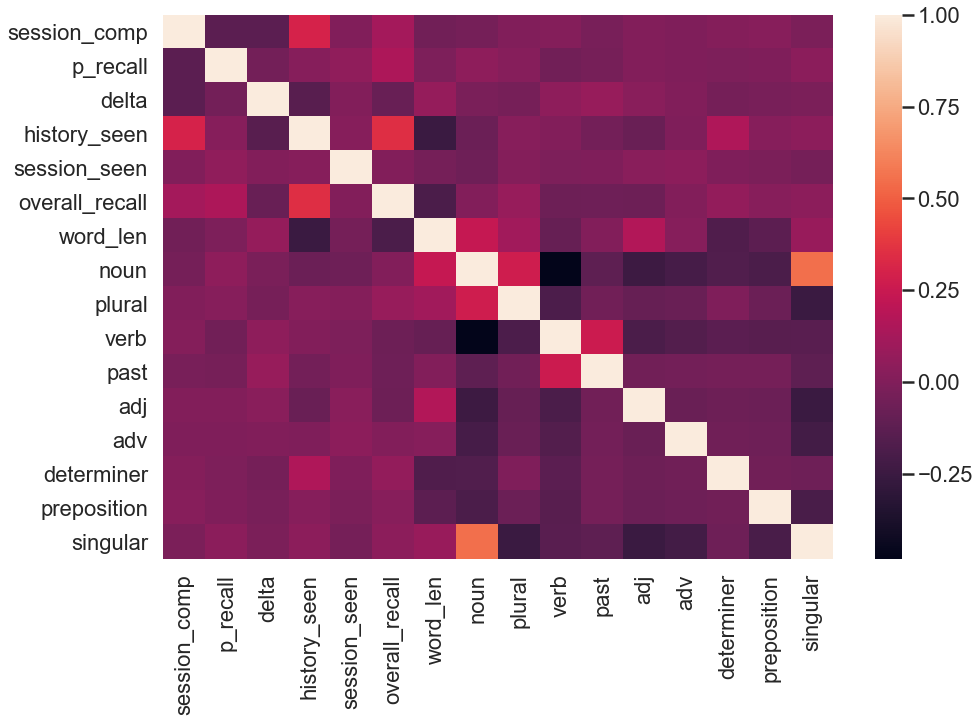

In [931]:
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(it_learn_eng_means.corr())

In [811]:
it_learn_eng_means.drop(columns = ["lexeme_id"], inplace= True)
it_learn_eng_means.head()

session_comp  p_recall         delta  history_seen  session_seen  \
0             0  0.818182  1.367093e+06      3.636364      1.000000   
1             1  0.952381  8.939086e+04      3.000000      1.714286   
2             2  1.000000  2.675096e+05      4.000000      1.000000   
4             4  1.000000  9.780300e+04      2.750000      1.250000   
5             5  1.000000  4.834733e+05      4.000000      1.333333   

   overall_recall  word_len  noun  plural  verb  past  adj  adv  determiner  \
0        0.920523       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0   
1        0.904762       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0   
2        0.942857       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0   
4        0.916667       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0   
5        0.888889       6.0   1.0     0.0   0.0   0.0  0.0  0.0         0.0   

   preposition  singular  
0          0.0       1.0  
1          0.0       1.0  
2          0.0       1.0  
4          0.0       1.0  
5          0.0       1.0

In [823]:
user_id_lex_id_max = it_learn_eng.groupby(['user_id', 'lexeme_id']).max()


In [841]:
user_id_lex_id_max.reset_index(inplace=True)


index user_id                         lexeme_id  p_recall   timestamp  \
0          0   u:HDJ  0e2694b6e1cd456c9c9c1a0478338c7d  1.000000  1362419471   
1          1   u:HDJ  1b924c4e39db1a5d0ea6dfac169497f8  1.000000  1362595356   
2          2   u:HDJ  22ae70952558ea3b3e01f94ce3a50bbd  0.500000  1362330934   
3          3   u:HDJ  295b2aeed6ae21efe706eea21af1fd8e  1.000000  1362859924   
4          4   u:HDJ  335095490e8c9843d23d82df9d1272e3  0.666667  1362419471   
5          5   u:HDJ  3445a3148b0eee9f34d06673fdd67b29  0.666667  1362596504   
6          6   u:HDJ  3ee8b0a26a1ad3625256f211f66f6b55  1.000000  1362595356   
7          7   u:HDJ  4379705a8d98bfe266ead99cfc4f52f8  1.000000  1362596504   
8          8   u:HDJ  4a4c57cc0632cb297e94efc594db617a  1.000000  1362330934   
9          9   u:HDJ  5a9f4b0b15f776a0969a77b4da979a98  1.000000  1362937395   
10        10   u:HDJ  9057a1c1deac19da984def346b0a2806  1.000000  1362330934   
11        11   u:HDJ  b7734a9e942f3e39f2d20b72bb598add  1.000000  1362330934   
12        12   u:HDJ  dbb7591f283beec7f6ef3b4a07cc05a3  1.000000  1362330934   
13        13   u:HDJ  efd1bf64096cdecc2ac7bf5c96badb9e  1.000000  1362330934   
14        14   u:HDJ  f8b990962558112003f9a04d41d527c4  1.000000  1362419471   
15        15  u:b6hR  088aac36e78fd43c271ec53eb7f70a60  1.000000  1362437620   
16        16  u:b6hR  1e1f8d730c4ba99ad2873a7608324cf6  1.000000  1362437848   
17        17  u:b6hR  2b97dce464f0a69324ffd2955a7eff1f  0.500000  1362437620   
18        18  u:b6hR  33a7fd42f74b2d2b1110f1b0c8b6db38  1.000000  1362437848   
19        19  u:b6hR  4e6eee1689a883a483fe26c82d14e8c9  1.000000  1362437848   
20        20  u:b6hR  5c1f70dd4ac671161963d4adbd17d725  1.000000  1362338862   
21        21  u:b6hR  6467457ef675ada64c360e7d17642aaf  1.000000  1362437848   
22        22  u:b6hR  803fb3436c1cd9be8aeef58b5698083d  1.000000  1362437848   
23        23  u:b6hR  827a8ecb89f9b59ac5c29b620a5d3ed6  1.000000  1362437848   
24        24  u:b6hR  8604eb68cfbda564312fe40ff4d5fdb0  1.000000  1362437848   
25        25  u:b6hR  8c8952fbf398f996438f9fd5a27f9d38  1.000000  1362437620   
26        26  u:b6hR  8e2f03617a85d97f126dfb2293e7a368  0.000000  1362437620   
27        27  u:b6hR  92545dc760008a4cdb29e841e6121952  0.000000  1362437848   
28        28  u:b6hR  928787744a962cd4ec55c1b22cedc913  1.000000  1362437848   
29        29  u:b6hR  94ce583e381ddf3a295d51b9578fdfe5  1.000000  1362437620   
...      ...     ...                               ...       ...         ...   
80240  80240  u:jhfh  dbfcff53f62c7064cd3af7e2838936f1  1.000000  1363098419   
80241  80241  u:jhfh  f21a429c717dd93b9f5723f20d87ab8a  1.000000  1363098419   
80242  80242  u:jhhA  0d9244f805fd55af1281a1bcb1a2cba6  1.000000  1363101732   
80243  80243  u:jhhA  16f2acaffe30cb9a81f422674d398df4  1.000000  1363101732   
80244  80244  u:jhhA  375662ec82debfdebd8215b147848cc7  0.750000  1363101732   
80245  80245  u:jhhA  547bb1812414cec172b0afef5ca93fce  1.000000  1363101732   
80246  80246  u:jhhA  65e39bd07057893f74d8db10b367f7aa  1.000000  1363101732   
80247  80247  u:jhhA  678bfa5d0ccd050c12395a792abaff12  0.800000  1363101732   
80248  80248  u:jhhA  80765ae2a08ba6812a4ab9df607b97d2  0.857143  1363101732   
80249  80249  u:jhhA  827a8ecb89f9b59ac5c29b620a5d3ed6  0.800000  1363101732   
80250  80250  u:jhhA  97e922f780d628eac638bea7a02bf496  0.916667  1363101732   
80251  80251  u:jhhA  b974624f112084b39586380fe4aaf32a  1.000000  1363101732   
80252  80252  u:jhqu  768f410a8fc1caa64ee36071082a231c  1.000000  1363103612   
80253  80253  u:jhqu  7dd6b30fc37ca73482a4d629bd93dac0  1.000000  1363103525   
80254  80254  u:jhyt  0d9244f805fd55af1281a1bcb1a2cba6  1.000000  1363104244   
80255  80255  u:jhyt  65e39bd07057893f74d8db10b367f7aa  1.000000  1363104244   
80256  80256  u:jhyt  827a8ecb89f9b59ac5c29b620a5d3ed6  1.000000  1363104244   
80257  80257  u:jhyt  97e922f780d628eac638bea7a02bf496  1.000000  1363104244   
80258  

In [842]:
user_id_lex_id_max.columns

Index(['index', 'user_id', 'lexeme_id', 'p_recall', 'timestamp', 'delta',
       'lexeme_string', 'history_seen', 'session_seen', 'overall_recall',
       'session_id', 'session_comp', 'word_len', 'noun', 'plural', 'verb',
       'past', 'adj', 'adv', 'determiner', 'preposition', 'singular',
       'overall_z_score'],
      dtype='object')

In [849]:
word_max_list = list(zip(user_id_lex_id_max.user_id, user_id_lex_id_max.lexeme_id, user_id_lex_id_max.session_id))


In [871]:
all_user_word_sessions = [str(item) for item in all_user_word_sessions]
word_max_list = [str(item) for item in word_max_list]

In [873]:
# all_user_word_sessions = list(zip(it_learn_eng.user_id, it_learn_eng.lexeme_id, it_learn_eng.session_id))
ind_dict = dict(zip(it_learn_eng.index,all_user_word_sessions))

ind_list = []
for k,v in ind_dict.items():
    if v in word_max_list:
        ind_list.append(k)
        

In [875]:
len(ind_list)           

80270

In [876]:
it_learn_eng[it_learn_eng.index.isin(ind_list)].shape

(80270, 22)

In [878]:
it_learn_eng = it_learn_eng[it_learn_eng.index.isin(ind_list)]

In [1195]:
features = [col for col in it_learn_eng_means.columns if col != 'overall_recall' and it_learn_eng_means[col].dtype in [np.float64, np.int64]]
X = it_learn_eng_means[features]
y = it_learn_eng_means.overall_recall

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [1196]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         overall_recall   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                          2.273e+04
Date:                Wed, 02 Oct 2019   Prob (F-statistic):                        0.00
Time:                        19:51:20   Log-Likelihood:                          5781.9
No. Observations:               16993   AIC:                                 -1.153e+04
Df Residuals:                   16978   BIC:                                 -1.142e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
session_comp     0.0008   3.27e-05     23.704      0.000       0.001       0.001
p_recall         0.3920      0.004     91.499      0.000       0.384       0.400
delta         2.144e-08   1.79e-09     11.996      0.000    1.79e-08    2.49e-08
history_seen     0.0026   6.27e-05     40.955      0.000       0.002       0.003
session_seen     0.0316      0.001     25.300      0.000       0.029       0.034
word_len         0.0181      0.001     26.470      0.000       0.017       0.019
noun             0.1306      0.005     25.483      0.000       0.121       0.141
plural           0.1013      0.006     17.062      0.000       0.090       0.113
verb             0.1825      0.005     39.711      0.000       0.174       0.192
past             0.0032      0.008      0.382      0.703      -0.013       0.020
adj              0.1608      0.006     25.332      0.000       0.148       0.173
adv              0.2034      0.007     30.414      0.000       0.190       0.216
determiner       0.2128      0.007     29.157      0.000       0.199       0.227
preposition      0.2398      0.007     35.542      0.000       0.227       0.253
singular         0.0672      0.004     16.812      0.000       0.059       0.075
==============================================================================
Omnibus:                      965.197   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3409.858
Skew:                          -0.197   Prob(JB):                         0.00
Kurtosis:                       5.159   Cond. No.                     7.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1197]:
# results.predict(X_test)
model_2 = sm.OLS(y_test,X_test)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         overall_recall   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              9667.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):                        0.00
Time:                        19:51:23   Log-Likelihood:                          2464.1
No. Observations:                7283   AIC:                                     -4898.
Df Residuals:                    7268   BIC:                                     -4795.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
session_comp     0.0007   4.98e-05     14.803      0.000       0.001       0.001
p_recall         0.3944      0.006     61.806      0.000       0.382       0.407
delta         2.247e-08   2.66e-09      8.452      0.000    1.73e-08    2.77e-08
history_seen     0.0021   9.17e-05     22.894      0.000       0.002       0.002
session_seen     0.0377      0.002     19.228      0.000       0.034       0.042
word_len         0.0183      0.001     17.294      0.000       0.016       0.020
noun             0.1212      0.008     15.541      0.000       0.106       0.136
plural           0.0987      0.009     10.898      0.000       0.081       0.117
verb             0.1730      0.007     24.686      0.000       0.159       0.187
past             0.0112      0.013      0.861      0.389      -0.014       0.037
adj              0.1589      0.010     16.272      0.000       0.140       0.178
adv              0.1982      0.010     19.762      0.000       0.179       0.218
determiner       0.2174      0.011     19.283      0.000       0.195       0.240
preposition      0.2202      0.011     20.606      0.000       0.199       0.241
singular         0.0741      0.006     12.313      0.000       0.062       0.086
==============================================================================
Omnibus:                      301.794   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.571
Skew:                          -0.140   Prob(JB):                    3.71e-192
Kurtosis:                       4.681   Cond. No.                     7.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1231]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1237]:
sns.set_context("poster")
f, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = X_test['history_seen'], y = y_test)
sns.scatterplot(x = X_test['history_seen'], y = results_2.predict(X_test))

plt.show()
# plt.savefig("obvs_pred_hist.png")




KeyError: (259.0, 0.0, '10.567567567567568', '.15', 'top', 'center', -657188457031278796, None, None, 72.0, <weakref at 0x1ab3667f48; to 'RendererAgg' at 0x1a509d91d0>, 1.2)

<Figure size 1080x720 with 1 Axes>

In [1055]:
import scipy.stats as stats

In [1091]:

print('Training r^2:', results.rsquared)
print('Testing r^2:', results_2.rsquared)
print('Training MSE:', mean_squared_error(y_train, results.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, results_2.predict(X_test)))

Training r^2: 0.9525705474587127
Testing r^2: 0.952271555381912
Training MSE: 0.029647359884158432
Testing MSE: 0.029761546265344548


In [663]:
import scipy

In [661]:
from scipy import stats

In [752]:
len(it_learn_eng.overall_recall)

424152

In [805]:
it_learn_eng_means.index

RangeIndex(start=0, stop=69549, step=1)

In [807]:
it_learn_eng_means.drop(it_learn_eng_means[it_learn_eng_means.overall_recall==1.0].index, inplace=True)
len(it_learn_eng_means)

41509

In [777]:
it_learn_eng.loc[it_learn_eng.overall_recall==0]

Empty DataFrame
Columns: [p_recall, timestamp, delta, user_id, lexeme_id, lexeme_string, history_seen, session_seen, overall_recall, session_id, session_comp, word_len, noun, plural, verb, past, adj, adv, determiner, preposition, singular]
Index: []

[0 rows x 21 columns]

In [778]:
len(it_learn_eng.loc[(it_learn_eng.overall_recall!= 1) | (it_learn_eng.overall_recall != 0)].overall_recall)

212870

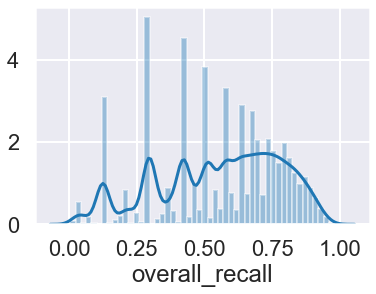

In [941]:
sns.distplot((it_learn_eng.overall_recall)**(3))

In [779]:
boxcot = scipy.stats.boxcox(it_learn_eng.overall_recall)
boxcot[0]

array([-0.07872533, -0.22747921, -0.06380015, ..., -0.20809959,
       -0.15607701, -0.22747921])

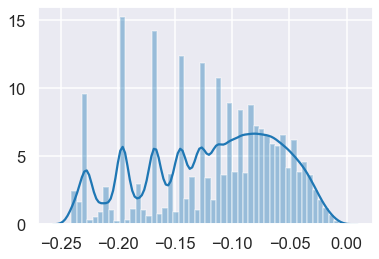

In [780]:

sns.distplot(boxcot[0])